# ASSIGNMENT-2

  Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
try:
    import emoji #If tweepy is already installed on the system
except:
    !pip install emoji
    import emoji

!pip install nltk
#import nltk package for text processing
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold,GridSearchCV
from sklearn.preprocessing import StandardScaler 
import re
import requests

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aditya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# DATA CLEANING AND EXPLORATORY DATA ANALYSIS- SENTIMENT.CSV

  Now lets inspect the Sentiment dataset

In [2]:
df=pd.read_csv("Sentiment.csv")
df.tail()

,sentiment,text
133806,Positive,"@scottw Nice, I have the 20/20 but to be hones..."
133807,Positive,â€œ@BW_React: #GOPDebate verdict: @JohnKasich ...
133808,Negative,@amtrack i am sorry .... i love you tho and t...
133809,Positive,@RazorTV http://tinyurl.com/d96txo - Champions...
133810,Negative,"Beautiful day, and I'm on my way to the office..."


**On inspection we see that we have @,# and other punctuations in the tweets. Lets convert the words to lowercase and remove all sopword, punctuations, emoticons and emoji. We also have to do lemmetization or stemming of the remaining words left in the tweet**

In [3]:
#CONVERT TWEETS TO LOWER CASE
dfa=df["text"]
dfa=np.array(dfa)
dfa=[str(i) for i in dfa]
dfa=[i.lower() for i in dfa]
print(dfa[0])

rt @diplomtc_immnty: @realdonaldtrump they tried to take you out &amp; your poll numbers skyrocketed. voters matter, not @foxnews moderators.
#â€¦


In [4]:
#EXTRACTING THE @ DATA FROM THE TWEETS
l_dfa=[]
for i in dfa:  
  w=[]
  List = i.split()
  for s in List:
      if s.startswith('@'):
          w.append(s)
  l_dfa.append(w)
print(l_dfa[0])
df["at"]=str(l_dfa)

['@diplomtc_immnty:', '@realdonaldtrump', '@foxnews']


In [5]:
#EXTRACTING THE HASH DATA FROM THE TWEETS
l1_dfa=[]
for i in dfa:  
  w=[]
  List = i.split()
  for s in List:
      if s.startswith('#'):
          w.append(s)
  l1_dfa.append(w)
print(l1_dfa[5])
df["hsh"]=l1_dfa

[]


In [6]:
#REMOVING RT-RETWEETS,URLS AND USERNAMES AND # IN HASHTAG
dfa=[re.sub('rt', '', i) for i in dfa] # remove rt[RETWEET]
dfa=[re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in dfa] # remove URLs
dfa=[re.sub('@[^\s]+', '', i) for i in dfa] # remove usernames
dfa=[re.sub(r'#([^\s]+)', r'\1', i) for i in dfa] # remove the # in #hashtag
print(dfa[0])

   they tried to take you out &amp; your poll numbers skyrocketed. voters matter, not  moderators.
â€¦


In [7]:
# TOKENIZING THE TWEETS AND REMOVING STOP WORDS
lst=[]
tokenizer = RegexpTokenizer(r'\w+')
for i in dfa:     
    b = tokenizer.tokenize(i)
    i_stop= [word for word in b if word not in stopwords.words('english')]
    lst.append(i_stop)
lst=np.array(lst)
print(lst[1])


['damn', 'jealous', 'wanna', 'watch', 'fight', 'love', 'ufc', 'one', 'knows']


In [8]:
# Define set of happy emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
#Function to remove emojis
def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)
 
#combine sad and happy emoticons
emoticons = emoticons_happy.union(emoticons_sad)

In [9]:
#REMOVE EMOTICONS 
l=[]
for i in lst:
  word_tokens = [word for word in i if not word in emoticons]
  l.append(word_tokens)
print(l[10])

['looks', 'good', 'personal', 'yet', 'professional', 'lucky', 'wife', 'could', 'say', 'got', 'done', 'house']


In [10]:
#REMOVW EMOJI'S
l1=[]
for i in l:
  word_tokens = [remove_emoji(word) for word in i]
  l1.append(word_tokens)
print(l1[10])

['looks', 'good', 'personal', 'yet', 'professional', 'lucky', 'wife', 'could', 'say', 'got', 'done', 'house']


In [11]:
#remove punctuation signs from tokens
table = str.maketrans('', '', string.punctuation)
l2=[]
for i in l1:
  word_tokens = [word.translate(table) for word in i]
  l2.append(word_tokens)
print(l2[10])

['looks', 'good', 'personal', 'yet', 'professional', 'lucky', 'wife', 'could', 'say', 'got', 'done', 'house']


In [12]:
#remove non-alphabetic characters
l3=[]
for i in l2:
  word_tokens = [word for word in i if word.isalpha()]
  l3.append(word_tokens)
print(l3[10])

['looks', 'good', 'personal', 'yet', 'professional', 'lucky', 'wife', 'could', 'say', 'got', 'done', 'house']


**EVENTHOUGH LEMMATIZATION TAKES LONGER TO RUN,WE CHOOSE LEMMATIZATION OVER STEMMING BECAUSE IT GIVES US THE ROOT WORD**

In [13]:
#LEMMATIZATION
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
l4=[]
for i in l3:
  lem=[lemmatizer.lemmatize(word) for word in i]
  l4.append(lem)
print(l4[10])

['look', 'good', 'personal', 'yet', 'professional', 'lucky', 'wife', 'could', 'say', 'got', 'done', 'house']


**NOW LETS VISUALIZE THE WORDS IN THE TWEETS USING WORD CLOUD**

In [14]:
#COMBINING THE LIST OF TWEETS(LIST) TO A SINGLE LIST
from itertools import chain
wordc=list(chain(*l4))
print(wordc[0:50])

['tried', 'take', 'amp', 'poll', 'number', 'skyrocketed', 'voter', 'matter', 'moderator', 'â', 'damn', 'jealous', 'wanna', 'watch', 'fight', 'love', 'ufc', 'one', 'know', 'listening', 'beatles', 'great', 'could', 'please', 'get', 'shout', 'anything', 'huge', 'fan', 'wait', 'new', 'cd', 'spotted', 'ur', 'message', 'tony', 'replied', 'finished', 'watching', 'lost', 'oh', 'faraday', 'pity', 'eloise', 'hawking', 'cold', 'heaed', 'b', 'hoping', 'nice']


In [15]:
# WORD COUNTER FOR WORD CLOUD
from collections import Counter
wcounter=Counter(wordc).most_common(100)
wco=dict(wcounter)
print(wco)

{'gopdebate': 8939, 'day': 8607, 'good': 7163, 'get': 7041, 'like': 6733, 'go': 6141, 'work': 5741, 'today': 5464, 'time': 5391, 'gopdebates': 5276, 'going': 5205, 'quot': 5049, 'u': 4969, 'one': 4901, 'love': 4767, 'back': 4736, 'got': 4716, 'night': 4527, 'amp': 4356, 'know': 4266, 'want': 4208, 'really': 4170, 'lol': 4028, 'think': 3897, 'need': 3688, 'last': 3674, 'im': 3643, 'see': 3640, 'still': 3477, 'well': 3417, 'twitter': 3245, 'morning': 3227, 'new': 3162, 'home': 3129, 'oh': 3124, 'thanks': 3084, 'much': 3001, 'great': 2819, 'make': 2778, 'hope': 2733, 'feel': 2709, 'miss': 2646, 'tomorrow': 2645, 'would': 2572, 'wish': 2540, 'sleep': 2511, 'right': 2423, 'come': 2326, 'thing': 2274, 'people': 2269, 'sad': 2231, 'fun': 2208, 'week': 2197, 'bad': 2181, 'ðÿ': 2157, 'tonight': 2094, 'happy': 2083, 'look': 2041, 'getting': 2031, 'sorry': 2029, 'say': 2028, 'nice': 2026, 'way': 2010, 'haha': 2001, 'bed': 1986, 'though': 1943, 'watching': 1926, 'trump': 1910, 'friend': 1904, 'bet

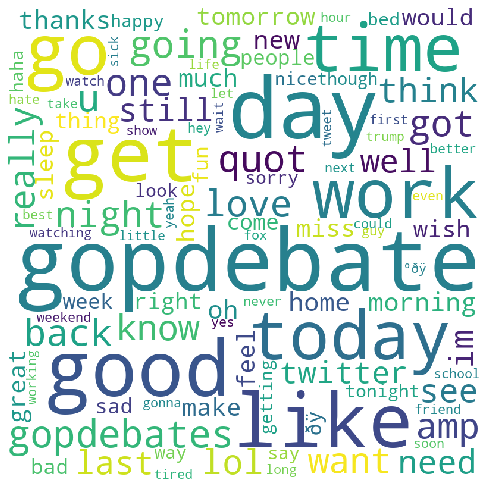

In [16]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords, min_font_size = 10).generate_from_frequencies(wco) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 5) 
  
plt.show() 

**LETS TRY TO CREATE WORD CLOUD IN THE FORM OF TWITTER ICON**

In [17]:
#Downloading Twitter icon image
img_data = requests.get("https://c10.patreonusercontent.com/3/eyJwIjoxfQ%3D%3D/patreon-media/p/post/7200517/72644204bb68492d917dce21a9796cd4/1.jpg?token-time=1585683389&token-hash=6YZh8ze3uiJlW60WWrwLsfN_2hhtzLVGHUD6-8tuL9o%3D").content
with open('p1.png', 'wb') as handler:
    handler.write(img_data)

In [18]:
# Generate a word cloud image mask
from PIL import Image, ImageDraw
mask = np.array(Image.open("p1.png"))

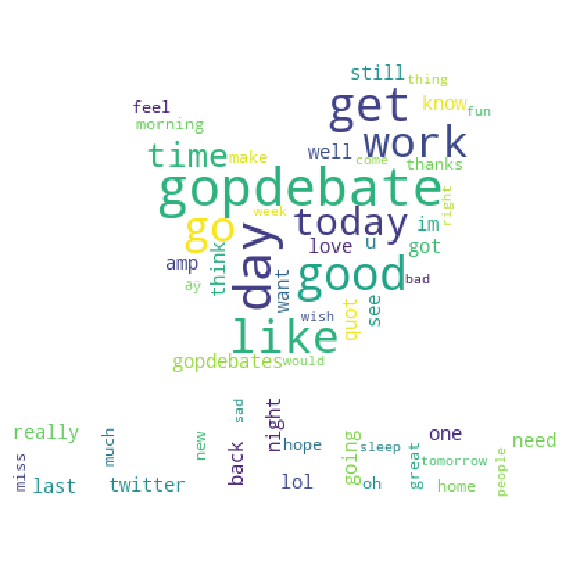

In [19]:
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',stopwords = stopwords, mask=mask, min_font_size = 10).generate_from_frequencies(wco) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = "none") 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 2) 
plt.tight_layout()
plt.show()

**NOW LETS SAVE THE TWEETS IN DATAFRAME**

In [20]:
# JOINING CLEANED TOKENIZED WORDS INTO TWEETS
splf=[]
s1 = " "
for i in l4:
  s1 = " "
  # print(i)
  s1=s1.join(i)
  splf.append (s1)
print(splf[1:5])

['damn jealous wanna watch fight love ufc one know', 'listening beatles great', 'could please get shout anything huge fan wait new cd', 'spotted ur message tony replied']


In [21]:
#STORING THE CLEANED TWEETS IN DATA FRAME
df["clean_data"]=splf

# CANADIAN ELECTION

In [22]:
df1=pd.read_csv("Canadian_elections_2019.csv")
print(df1['text'][1])
df1.head()

b"#AllWomanSpacewalk it's real!\n@Space_Station \n#EtobicokeNorth #CityofTO #ONPoli #cdnpoli #elxn43 https://t.co/wgdXLksTbQ"


,sentiment,negative_reason,text
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."


**WHEN WE OBSERVE THE TWEETS WE SEE THAT THERE IS b" CHARECTER IN FRONT OF TWEETS.     
WE WILL REMOVE b" CHARECTER AND DO THE SAME DATA CLEANING STEPS WE DID FOR SENTIMENT DATASET (i.e) EXTRACTING @ AND # WORDS IN TWEET.  
REMOVING URLS,STOPWORDS,PUNCTUATIONS, EMOTICON,EMOJIS AND THEN FINALLY WE WILL LEMMATIZE THE TWEETS**

In [23]:
dfa1=df1["text"]

In [24]:
dfa1 =[re.sub(r'b"([^\s]+)', r'\1', i) for i in dfa1] # remove the b" 

In [25]:
# CONVERTING THE TWEETS TO LOWER CASE
dfa1=np.array(dfa1)
dfa1=[str(i) for i in dfa1]
dfa1=[i.lower() for i in dfa1]
print(dfa1[0])

@rosiebarton so instead of your suggestion, how about we agree that #canadian #women can not and should not trust that #andrewscheer and a #conservatives government will protect a woman's right to have automony over her body. let's go with that.  #cdnpoli #elxn43  #canada #abortion"


In [26]:
#EXTRACTING THE @ DATA FROM THE DF
l_dfa1=[]
for i in dfa1:  
  w=[]
  List = i.split()
  for s in List:
      if s.startswith('@'):
          s=s.lstrip("@")
          w.append(s)
  w1='  '.join(w)
  l_dfa1.append(w1)

print(l_dfa1[0])
l_dfa1s=[str(i) for i in l_dfa1]
df1["at"]=l_dfa1s

rosiebarton


In [27]:
#EXTRACTING THE # DATA FROM THE DF
l_dfa2=[]
for i in dfa1:  
  w=[]
  List = i.split()
  for s in List:
      if s.startswith('#'):
          s=s.lstrip("#")
          w.append(s)
          # print(w)
  w1='  '.join(w)
  # print(w1)
  l_dfa2.append(w1)
print(l_dfa2[0])
l_dfa2s=[str(i) for i in l_dfa2]
df1["hsh"]=l_dfa2s

canadian  women  andrewscheer  conservatives  cdnpoli  elxn43  canada  abortion"


In [28]:
#REMOVING URLS, USERNAMES AND HASHES
dfa1=[re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in dfa1] # remove URLs
dfa1=[re.sub('@[^\s]+', '', i) for i in dfa1] # remove usernames
dfa1 =[re.sub(r'#([^\s]+)', r'\1', i) for i in dfa1] # remove the # in #hashtag

print(dfa1[0])

 so instead of your suggestion, how about we agree that canadian women can not and should not trust that andrewscheer and a conservatives government will protect a woman's right to have automony over her body. let's go with that.  cdnpoli elxn43  canada abortion"


In [29]:
#REMOVING STOP WORDS AND TOKENIZING TWEETS
lstc=[]
tokenizer = RegexpTokenizer(r'\w+')
for i in dfa1:    
    b = tokenizer.tokenize(i)
    i_stop= [word for word in b if word not in stopwords.words('english')]
    lstc.append(i_stop)
lstc=np.array(lstc)
print(lstc[0])


['instead', 'suggestion', 'agree', 'canadian', 'women', 'trust', 'andrewscheer', 'conservatives', 'government', 'protect', 'woman', 'right', 'automony', 'body', 'let', 'go', 'cdnpoli', 'elxn43', 'canada', 'abortion']


In [30]:
#remove emoticons 
lc=[]
for i in lstc:
  word_tokens = [word for word in i if not word in emoticons]
  lc.append(word_tokens)
print(lc[10])

['elxn43', 'two', 'days', 'away', 'voting', 'e', 'day', 'read', 'primer', 'learn', 'vote', 'vote', 'vote', 'vote', 'n', 'n']


In [31]:
#remove emojis
lc1=[]
for i in lc:
  word_tokens = [remove_emoji(word) for word in i]
  lc1.append(word_tokens)
print(lc1[10])

['elxn43', 'two', 'days', 'away', 'voting', 'e', 'day', 'read', 'primer', 'learn', 'vote', 'vote', 'vote', 'vote', 'n', 'n']


In [32]:
#remove punctuation signs from tokens
table = str.maketrans('', '', string.punctuation)
lc2=[]
for i in lc1:
  word_tokens = [word.translate(table) for word in i]
  lc2.append(word_tokens)
print(lc2[10])

['elxn43', 'two', 'days', 'away', 'voting', 'e', 'day', 'read', 'primer', 'learn', 'vote', 'vote', 'vote', 'vote', 'n', 'n']


In [33]:
#remove non-alphabetic characters
lc3=[]
for i in lc2:
  word_tokens = [word for word in i if word.isalpha()]
  lc3.append(word_tokens)
print(lc3[10])

['two', 'days', 'away', 'voting', 'e', 'day', 'read', 'primer', 'learn', 'vote', 'vote', 'vote', 'vote', 'n', 'n']


In [34]:
# LEMMATIZATION OF TWEETS
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lc4=[]
for i in lc3:
  lem=[lemmatizer.lemmatize(word) for word in i]
  lc4.append(lem)
print(lc4[10])

['two', 'day', 'away', 'voting', 'e', 'day', 'read', 'primer', 'learn', 'vote', 'vote', 'vote', 'vote', 'n', 'n']


In [35]:
# JOINING CLEANED TOKENIZED WORDS INTO TWEETS
splfc=[]
s1 = " "
for i in lc4:
  s1 = " "
  s1=s1.join(i)
  splfc.append (s1)
print(splfc[1:5])

['allwomanspacewalk real n netobicokenorth cityofto onpoli cdnpoli', 'brantford going cost billion next year ask justin cdnpoli canada', 'canada canadavotes n ncan decide help n n', 'canada taxpayer sick amp tired hard earned donated corporate welfare bum need one many reason trudeaumustgo leave canada care snclavalinscandal cdnpoli']


In [36]:
#STORING THE CLEANED DATA
df1["clean_tweet"]=splfc

# CONSERVATIVE,LIBERALS,NDP,NONE

 **TO IDENTIFY THE PARTY TO WHICH THE TWEET BELONGS TO, LETS FIRST ANALYZE THE @ AND # DATA EXTRACTED DURING DATA CLEANING TO LOOK AT THE MOST FREQUENT WORDS AND TAGS**

In [37]:
hsh=(df1["hsh"]) # HASH TAGS IN THE TWEETS
at=df1["at"] #AT DATA IN THE TWEETS
ct=df1["clean_tweet"] #CLEANED TWITTER DATA

**HASH DATA ANALYSIS:**

In [38]:
#TOKENIZING HASH DATA
l=[]
for i in hsh:
  j=i.split()
  l.append(j) 
print(l[1])

#CONVERTING LIST OF LIST TO SINGLE LIST
u=[j for i in l for j in i]
u=np.array(u)

#STORING THE DATA IN A DF FOR ANALYSIS PURPOSE
tdf=pd.DataFrame(u)
tdf.columns=["tweets"]

['allwomanspacewalk', 'cityofto', 'onpoli', 'cdnpoli', 'elxn43']


In [39]:
#TOP 20 HASH DATA BASED ON COUNTS
tdf.tweets.value_counts()[1:20]

cdnpoli          798
elxn43'          261
chooseforward    109
elxn43"           95
cdnpoli'          72
cpc               62
elxn2019          53
trudeaumustgo     51
kinsellagate      47
cdnelxn2019       41
uprisingh         40
canada            40
abpoli            39
ndp               35
bcpoli            30
ableg             28
cdnmedia          27
onpoli            27
skpoli            26
Name: tweets, dtype: int64

**FROM THE TOP 20 HASH DATA WE GET KEY WORDS LIKE  
"chooseforward",  
"trudeaumustgo",   
"kinsellagate",   
"uprisingh"**   
  
   **THESE WORDS CAN BE USED TO CREATE A MASTER LIST FOR EACH PARTY AND BASED ON THE LIST WE SEARCH THE TWEETS TO FIND THE PARTY TO WHICH THE TWEET BELONGS TO**  

**@ DATA ANALYSIS:**

In [40]:
#TOKENIZING @ DATA
a1=[]
for i in at:
  j=i.split()
  a1.append(j) 
print(a1[0])

#CONVERTING LIST OF LIST TO SINGLE LIST
a2=[j for i in a1 for j in i]
a2=np.array(a2)

#STORING THE DATA IN A DF FOR ANALYSIS PURPOSE
tdf1=pd.DataFrame(a2)
tdf1.columns=["at"]

['rosiebarton']


In [41]:
#TOP 20 @ DATA BASED ON COUNTS
tdf1["at"].value_counts()[0:20]

andrewscheer       132
justintrudeau       98
cpc_hq              79
thejagmeetsingh     43
liberal_party       43
maximebernier       31
cbckatie            30
ndp                 30
canadiangreens      26
kinsellawarren      23
vankayak            22
ctvnews             20
elizabethmay        18
globeandmail        17
rosiebarton         17
jkenney             17
cbcnews             15
peoplespca          14
puglaas             13
electionscan_e      13
Name: at, dtype: int64

**FROM THE TOP 20 @ DATA WE GET KEY WORDS LIKE  
"andrewscheer",       
"justintrudeau",     
"cpc_hq",              
"thejagmeetsingh"** 
  

**NOW LETS CREATE THE LIST OF WORDS TO IDENTIFY POLITICAL PARTY BASED ON MOST USED HASH AND @ WORDS**

In [42]:
# MASTER LIST TO IDENTIFY POLITICAL PARTY
co=['conser',"schee","cpc","kinsella","jkenney","maximebernier"]
li=["liber","snc","trudeau","lpc","vankayak","chooseforward","puglaas","Jody"]
ndp=["singh","ndp"]

**NOW WE CREATE A FUNCTION TO SEARCH THE TWEETS FRO THE STRINGS IN MASTER LIST.**



In [43]:
# FUNCTION TO FIND THE COUNT OF TWEETS BELONGING TO EACH POLITICAL PARTY
def count (data,master_list):
  p=[]
  for i in data:
    s=len(p)
    for j in master_list:
      if re.search(j,i):
        p.append(1)
        break
      else:
        continue
    if (len(p) == s):
      p.append(0)
  return(np.sum(p),p) # FUNCTION RETURNS COUNTS AND INDEX

**HASH DATA COUNT:**

In [44]:
#COUNTS BASED ON HASH DATA
print("HASH DATA")
u1,s1=count(hsh,co) # U1 IS THE COUNTS, S1 IS THE INDEX
print("Conservative Party of Canada,Tweet count=",u1)
u2,s2=count(hsh,li)
print("Liberal Party of Canada,Tweet count=",u2)
u3,s3=count(hsh,ndp)
print("New Democratic Party of Canada,Tweet count=",u3)

HASH DATA
Conservative Party of Canada,Tweet count= 284
Liberal Party of Canada,Tweet count= 293
New Democratic Party of Canada,Tweet count= 116


**AT DATA COUNT:**

In [45]:
#COUNTS BASED ON AT DATA
print("AT DATA")
ua1,sa1=count(at,co)
print("Conservative Party of Canada,Tweet count=",ua1)
ua2,sa2=count(at,li)
print("Liberal Party of Canada,Tweet count=",ua2)
ua3,sa3=count(at,ndp)
print("New Democratic Party of Canada,Tweet count=",ua3)

AT DATA
Conservative Party of Canada,Tweet count= 251
Liberal Party of Canada,Tweet count= 154
New Democratic Party of Canada,Tweet count= 73


**WHOLE TWEET COUNT:** 

In [46]:
#COUNTS BASED ON WHOLE TWEET
print("WHOLE TWEET")
uc1,sc1=count(ct,co)
print("Conservative Party of Canada,Tweet count=",uc1)
uc2,sc2=count(ct,li)
print("Liberal Party of Canada,Tweet count=",uc2)
uc3,sc3=count(ct,ndp)
print("New Democratic Party of Canada,Tweet count=",uc3)

WHOLE TWEET
Conservative Party of Canada,Tweet count= 632
Liberal Party of Canada,Tweet count= 582
New Democratic Party of Canada,Tweet count= 194


# TOTAL TWEET COUNT FOR EACH PARTY:

In [47]:
# COMBINING COUNTS BASED ON HASH,@,WHOLE TWEET
z1=[a + b+c for a, b,c in zip(s1, sa1, sc1)]
z1=[bool(i) for i in z1]
print("Conservative Party of Canada,Tweet count=",np.sum(z1))
df1["co"]=z1

Conservative Party of Canada,Tweet count= 776


In [48]:
# COMBINING COUNTS BASED ON HASH,@,WHOLE TWEET
z2=[a + b + c for a, b, c in zip(s2, sa2, sc2)]
z2=[bool(i) for i in z2]
print("Liberal Party of Canada,Tweet count=",np.sum(z2))
df1["li"]=z2

Liberal Party of Canada,Tweet count= 667


In [49]:
# COMBINING COUNTS BASED ON HASH,@,WHOLE TWEET
z3=[a + b + c for a, b, c in zip(s3, sa3, sc3)]
z3=[bool(i) for i in z3]
print("New Democratic Party of Canada,Tweet count=",np.sum(z3))
# print(int(z3[1]))
df1["ndp"]=z3

New Democratic Party of Canada,Tweet count= 245


**IDENTIFYTING TWEETS WHICH INVOLVES MORE THAN ONE PARTY**

In [50]:
# IDENTIFYING TWEETS BASED ON MONE THAN ONE PARTY
z1=[int(i)*1 for i in z1]
z2=[int(i)*2 for i in z2]
z3=[int(i)*3 for i in z3]
z=[a + b + c for a, b, c in zip(z1, z2, z3)]
print(z[0:10])
print(ct[7])

[1, 0, 0, 0, 2, 1, 0, 5, 2, 3]
cdnpoli liberal double promised national debt next term elected forecasting billion w national pharmacare program incl w ndp coalition billion seems possible imo


**WE SEE THAT THE INDEX SHOWS THAT THE 7TH DATA VALUE IS 5 THAT IS IT IS BASED ON MORE THAN ONE PARTY    
WHILE PRINTING OUT THE TWEET WE SEE THAT THE TWEET HAS TWO KEYWORDS "LIBERAL", "NDP"**


['1+ party' 'CONSERVATIVES' 'LIBERALS' 'NDP' 'OTHERS']


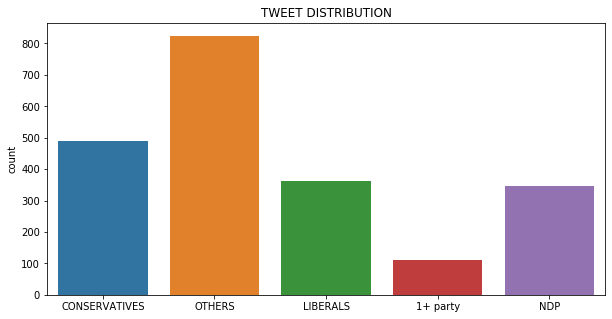

In [51]:
#CONVERTING THE INDEX TO LABELS
zf=z
for i in range(len(zf)):
  if zf[i]==0:
    zf[i]="OTHERS"
  elif zf[i]==1:
    zf[i]="CONSERVATIVES"
  elif zf[i]==2:
    zf[i]="LIBERALS"
  elif zf[i]==3:
    zf[i]="NDP"
  else:
    zf[i]="1+ party"
# print(len(zf))
print(np.unique(zf))

plt.figure(figsize=(10,5))
plt.title("TWEET DISTRIBUTION")
sns.countplot(x=zf)
plt.show()

# MODEL PREPARATION AND MODEL IMPLEMENTATION
# SENTIMENT DATA SET:

In [52]:
df.columns

Index(['sentiment', 'text', 'at', 'hsh', 'clean_data'], dtype='object')

In [53]:
print(df.sentiment.unique())

['Positive' 'Negative' 'Neutral']


**WE SEE THAT THE SENTIMENT DATASET HAS NEUTRAL VALUES.   
WE DONT NEED NEUTRAL VALUES, SO LETS DROP THEM**

In [54]:
print("Before Dropping",df.shape)
ind=df[df.sentiment=="Neutral"].index
dff=df.drop(axis=0,index=ind)
print("After Dropping",dff.shape)

Before Dropping (133811, 5)
After Dropping (130669, 5)


In [55]:
# ENCODING THE SENTIMENT DATA
s_map={'Positive': 1, 'Negative' :0}
target=dff.sentiment.map(s_map)
target=np.array(target)
print("TARGET",target[0:5])
print("SHAPE OF TARGET",np.shape(target))

TARGET [1 0 1 1 1]
SHAPE OF TARGET (130669,)


In [56]:
#FEATURES
feat=dff["clean_data"]
feat.shape

(130669,)

 **WE ARE USING TF-IDF AND WORD FREQUENCY FOR FEATURE CONVERSION**

# TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=True,max_features=1000)
tfs = tfidf.fit_transform(feat)

In [58]:
print(tfs.shape)

(130669, 1000)


In [59]:
xtrain,xtest,ytrain,ytest=train_test_split(tfs,target,random_state=42)
print(np.shape(xtrain),np.shape(xtest))

(98001, 1000) (32668, 1000)


**WE FIT THE TF-IDF FEATURE VECTOR WITH THE FOLLOWING MODELS
 LOGISTIC REGRESSION      
 MULTINOMIAL NAIVE BAYES     
 KNN  
 SVM   
 DECISION TREES  
 RANDOM FOREST     
 GRADIENT BOOSTING    
 XGBOOST**  

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# HYPER PARAMETER TUNING: 
**HYPER PARAMETER TUNING WITH CROSSVALIDATION IS DONE FOR ALL THESE MODELS AND THE BEST MODEL IS SELECTED FOR ACCURACY CALCULATION**

**THE HYPERPARAMETER TUNING PART OF THE CODE HAS BEEN CONVERTED TO COMMENTS SINCE IT TAKES LONGER TIME TO RUN**

**THEY CAN BE UNCOMMENTED AND CHECKED IF NEEDED**



In [61]:
# #List Hyperparameters that we want to tune.
# solver= ['newton-cg','lbfgs','liblinear', 'sag', 'saga']
# C = [0.001,0.01,0.1,1]

# #Convert to dictionary
# hyperparameters = dict(solver=solver,C=C)

# #Create new model
# lr=LogisticRegression()

# #Use GridSearch
# clf = GridSearchCV(lr, hyperparameters, cv=5)

# #Fit the model
# lr_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best solver:', lr_best_model.best_estimator_.get_params()['solver'])
# print('Best C:', lr_best_model.best_estimator_.get_params()['C'])
# print('Best Model score:', lr_best_model.best_score_*100)
# print('\n Best model:',lr_best_model.best_estimator_)

Best solver: newton-cg   
Best C: 1   
Best Model score: 74.21556719825831   

 Best model: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
#LOGISTIC REGRESSION
print("\nLOGISTIC REGRESSION")
# lr=lr_best_model

lr=LogisticRegression(C=1,solver='newton-cg')
lr_model=lr.fit(xtrain,ytrain)

lr_pred=lr.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(lr_pred,ytrain)*100,2))
lr_pred=lr.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(lr_pred,ytest)*100,2))


LOGISTIC REGRESSION
TRAINING ACCURACY 75.03
TESTING ACCURACY 74.15


In [63]:
#MULTINOMIAL NAIVE BAYES
print("\nMULTINOMIAL NAIVE BAYES")
mnb=MultinomialNB()
mnb=mnb.fit(xtrain,ytrain)
mnb_pred=mnb.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(mnb_pred,ytrain)*100,2))
mnb_pred=mnb.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(mnb_pred,ytest)*100,2))


MULTINOMIAL NAIVE BAYES
TRAINING ACCURACY 73.33
TESTING ACCURACY 72.58


In [64]:
# #List Hyperparameters that we want to tune.
# n_neighbors = list(range(1,5))

# #Convert to dictionary
# hyperparameters = dict( n_neighbors=n_neighbors)

# #Create new KNN object
# knn = KNeighborsClassifier()

# #Use GridSearch
# clf = GridSearchCV(knn, hyperparameters, cv=5)

# #Fit the model
# knn_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best n_neighbors:', knn_best_model.best_estimator_.get_params()['n_neighbors'])
# print('Best Model score:', knn_best_model.best_score_*100)
# print('\n Best model:',knn_best_model.best_estimator_)

Best n_neighbors: 4  
Best Model score: 65.1136211813433  

 Best model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [65]:
# K NEAREST NEIGHBOUR-KNN
print("\nK NEAREST NEIGHBOUR-KNN")
# knn=knn_best_model

knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)
pred=knn.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=knn.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


K NEAREST NEIGHBOUR-KNN
TRAINING ACCURACY 77.51
TESTING ACCURACY 65.53


**SVM** IS IMPLEMENTED USING SGD **(Stochastic Gradient Descent)** WITH **HINGE LOSS** 

In [66]:
# #List Hyperparameters that we want to tune.
# a = [0.0001,0.001,0.01,0.1,1]

# #Convert to dictionary
# hyperparameters = dict(alpha=a)

# #Create new model
# sgd=SGDClassifier(loss='hinge')

# #Use GridSearch
# clf = GridSearchCV(sgd, hyperparameters, cv=5)

# #Fit the model
# sgd_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Learning Rate:', sgd_best_model.best_estimator_.get_params()['alpha'])
# print('Best Model score:', sgd_best_model.best_score_*100)
# print('\n Best model:',sgd_best_model.best_estimator_)

Best Learning Rate: 0.0001   
Best Model score: 74.06760915988251   

 Best model: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
# SVM-SGD
print("\nSVM-SGD")
# sgd=sgd_best_model

sgd= SGDClassifier(alpha=0.0001,loss='hinge')
# sgd=SGDClassifier(loss='hinge')
sgd.fit(xtrain,ytrain)
pred=sgd.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=sgd.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


SVM-SGD
TRAINING ACCURACY 74.84
TESTING ACCURACY 73.85


In [68]:
# #List Hyperparameters that we want to tune.
# criterion=['gini', 'entropy']
# splitter=['best', 'random']

# #Convert to dictionary
# hyperparameters = dict(criterion=criterion,splitter=splitter)

# #Create a new model
# dt=DecisionTreeClassifier()

# #Use GridSearch
# clf = GridSearchCV(dt, hyperparameters, cv=5)

# #Fit the model
# dt_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Criterion:', dt_best_model.best_estimator_.get_params()['criterion'])
# print('Best Splitter:', dt_best_model.best_estimator_.get_params()['splitter'])

# print('Best Model score:', dt_best_model.best_score_*100)
# print('\n Best model:',dt_best_model.best_estimator_)

Best Criterion: entropy  
Best Splitter: random  
Best Model score: 69.0819436013781  

 Best model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [69]:
# DECISION TREES
print("\nDECISION TREES")
# dt=dt_best_model
dt= DecisionTreeClassifier( criterion='entropy', splitter='random')

dt.fit(xtrain,ytrain)

pred=dt.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=dt.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


DECISION TREES
TRAINING ACCURACY 95.78
TESTING ACCURACY 69.07


In [70]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# rf=RandomForestClassifier()

# #Use GridSearch
# clf = GridSearchCV(rf, hyperparameters, cv=2)

# #Fit the model
# rf_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', rf_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', rf_best_model.best_score_*100)
# print('\n Best model:',rf_best_model.best_estimator_)

Best Estimator Count: 100  
Best Model score: 72.95741779947015  

 Best model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
# RANDOM FOREST
print("\nRANDOM FOREST")
# rf=rf_best_model
rf=RandomForestClassifier(n_estimators=100)


rf.fit(xtrain,ytrain)
pred=rf.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=rf.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


RANDOM FOREST
TRAINING ACCURACY 95.78
TESTING ACCURACY 73.04


In [72]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,75,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# gb=GradientBoostingClassifier()

# #Use GridSearch
# clf = GridSearchCV(gb, hyperparameters, cv=2)

# #Fit the model
# gb_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', gb_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', gb_best_model.best_score_*100)
# print('\n Best model:',gb_best_model.best_estimator_)

Best Estimator Count: 100  
Best Model score: 66.51972479528739  

 Best model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [73]:
# GRADIENT BOOSTING
print("\nGRADIENT BOOSTING")
gb=GradientBoostingClassifier(n_estimators=100)
# gb=gb_best_model
gb.fit(xtrain,ytrain)
pred=gb.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=gb.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


GRADIENT BOOSTING
TRAINING ACCURACY 67.36
TESTING ACCURACY 66.48


In [74]:
! pip install --upgrade xgboost
from xgboost import XGBClassifier

Requirement already up-to-date: xgboost in c:\users\aditya\anaconda3\lib\site-packages (1.0.2)


In [75]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# xgb = XGBClassifier()

# #Use GridSearch
# clf = GridSearchCV(xgb, hyperparameters, cv=2)

# #Fit the model
# xgb_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', xgb_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', xgb_best_model.best_score_*100)
# print('\n Best model:',xgb_best_model.best_estimator_)

Best Estimator Count: 100  
Best Model score: 72.38089376768238   

 Best model: XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [76]:
# xgb_model = XGBClassifier()
xgb_model=XGBClassifier(n_estimators=100)
xgb_model.fit(xtrain,ytrain)
print("XGBOOST")
pred=xgb_model.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=xgb_model.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))

XGBOOST
TRAINING ACCURACY 75.49
TESTING ACCURACY 72.72


# SENTIMENT DATASET ACCURACIES:   

**LOGISTIC REGRESSION**   
TRAINING ACCURACY 75.03  
TESTING ACCURACY 74.15   

**MULTINOMIAL NAIVE BAYES**  
TRAINING ACCURACY 73.33  
TESTING ACCURACY 72.58    

**K NEAREST NEIGHBOUR-KNN**    
TRAINING ACCURACY 77.51  
TESTING ACCURACY 65.53   

**SVM-SGD**   
TRAINING ACCURACY 74.81  
TESTING ACCURACY 73.88    

**DECISION TREES**  
TRAINING ACCURACY 95.78   
TESTING ACCURACY 69.02     
  
**RANDOM FOREST**  
TRAINING ACCURACY 95.78  
TESTING ACCURACY 72.92  

**GRADIENT BOOSTING**  
TRAINING ACCURACY 67.03  
TESTING ACCURACY 66.32    

**XGBOOST:**    
TRAINING ACCURACY 75.49   
TESTING ACCURACY 72.72  

**WE CAN SEE THAT ALMOST ALL MODELS HAVE TESTING ACCURACY IN THE 70'S**     
 
**WE CAN ALSO SEE THAT THE RANDOM FOREST AND DECISON TREES HAVE VERY HIGH TRAINING ACCURACIES COMPARED TO OTHER MODELS EVEN AFTER HYPERPARAMETER TUNING WITH CROSS VALIDATION**


# CANADIAN DATA SET:

**NOW LETS TEST THESE MODELS ON CANADIAN DATASET**

In [77]:
df1.head() 

,sentiment,negative_reason,text,at,hsh,clean_tweet,co,li,ndp
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton,canadian women andrewscheer conservatives ...,instead suggestion agree canadian woman trust ...,True,False,False
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",,allwomanspacewalk cityofto onpoli cdnpoli ...,allwomanspacewalk real n netobicokenorth cityo...,False,False,False
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",,brantford elxn43 cdnpoli canada,brantford going cost billion next year ask jus...,False,False,False
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",,canada canadaelection2019 canadavotes,canada canadavotes n ncan decide help n n,False,False,False
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",snclavalin sheila_copps,canada taxpayers trudeaumustgo. canada snc...,canada taxpayer sick amp tired hard earned don...,False,True,False


In [78]:
df1.sentiment.unique()

array(['Negative', 'Positive'], dtype=object)

**LETS LABEL ENCODE THE SENTIMENT DATA**

In [79]:
ct=df1["clean_tweet"]
s_map={'Positive': 1, 'Negative' :0}
tgt=df1.sentiment.map(s_map)
print(tgt[0:5])
print(np.shape(tgt))
df1["sentiment_le"]=tgt

0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: int64
(2133,)


In [80]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(use_idf=True,max_features=1000)
tfs_ca = tfidf.fit_transform(ct)

**TESTING DATA WITH THE TRAINED MODEL:**

In [81]:
lr_ca_pred=lr.predict(tfs_ca)
print("LOGISTIC REGRESSION")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt,lr_ca_pred)*100,2))
mnb_ca_pred=mnb.predict(tfs_ca)
print("\nNAIVE BAYES")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt,mnb_ca_pred)*100,2))
knn_ca_pred=knn.predict(tfs_ca)
print("\nKNN")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt,knn_ca_pred)*100,2))
sgd_ca_pred=mnb.predict(tfs_ca)
print("\nSVM-SGD")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt,sgd_ca_pred)*100,2))
dt_ca_pred=dt.predict(tfs_ca)
print("\nDECISION TREES")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt,dt_ca_pred)*100,2))
rf_ca_pred=rf.predict(tfs_ca)
print("\nRANDOM FOREST")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt,rf_ca_pred)*100,2))
gb_ca_pred=gb.predict(tfs_ca)
print("\nGRADIENT BOOSTING")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt,gb_ca_pred)*100,2))
xgb_ca_pred=xgb_model.predict(tfs_ca)
print("\nXGRADIENT BOOSTING")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt,xgb_ca_pred)*100,2))

LOGISTIC REGRESSION
CANADIAN DATASET ACCURACY 52.18

NAIVE BAYES
CANADIAN DATASET ACCURACY 51.01

KNN
CANADIAN DATASET ACCURACY 48.85

SVM-SGD
CANADIAN DATASET ACCURACY 51.01

DECISION TREES
CANADIAN DATASET ACCURACY 52.23

RANDOM FOREST
CANADIAN DATASET ACCURACY 53.35

GRADIENT BOOSTING
CANADIAN DATASET ACCURACY 50.4

XGRADIENT BOOSTING
CANADIAN DATASET ACCURACY 54.57


# CANADIAN DATASET ACCURACY
**LOGISTIC REGRESSION**   
CANADIAN DATASET ACCURACY 52.18  

**NAIVE BAYES**   
CANADIAN DATASET ACCURACY 51.01  

**KNN**   
CANADIAN DATASET ACCURACY 48.85  

**SVM-SGD**   
CANADIAN DATASET ACCURACY 51.01  

**DECISION TREES**   
CANADIAN DATASET ACCURACY 53.26  

**RANDOM FOREST**   
CANADIAN DATASET ACCURACY 54.24  

**GRADIENT BOOSTING**   
CANADIAN DATASET ACCURACY 49.84   

**XGRADIENT BOOSTING**  
CANADIAN DATASET ACCURACY 54.57  

WE SEE THAT **XGBOOST** HAS THE HIGHEST ACCURACY FOLLOWED BY **RANDOM FOREST** AND DECISION TREES

# XGBOOST ALGORITHM HAS THE BEST PERFORMANCE

**USING XGBOOST LETS ANALYZE THE PARTY WISE SENTIMENT PREDICTION** 

In [82]:
pre=xgb_model.predict(tfs_ca)

In [83]:
df1["prediction_xgb"]=pre

In [84]:
df1.columns

Index(['sentiment', 'negative_reason', 'text', 'at', 'hsh', 'clean_tweet',
       'co', 'li', 'ndp', 'sentiment_le', 'prediction_xgb'],
      dtype='object')

C:\Users\aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


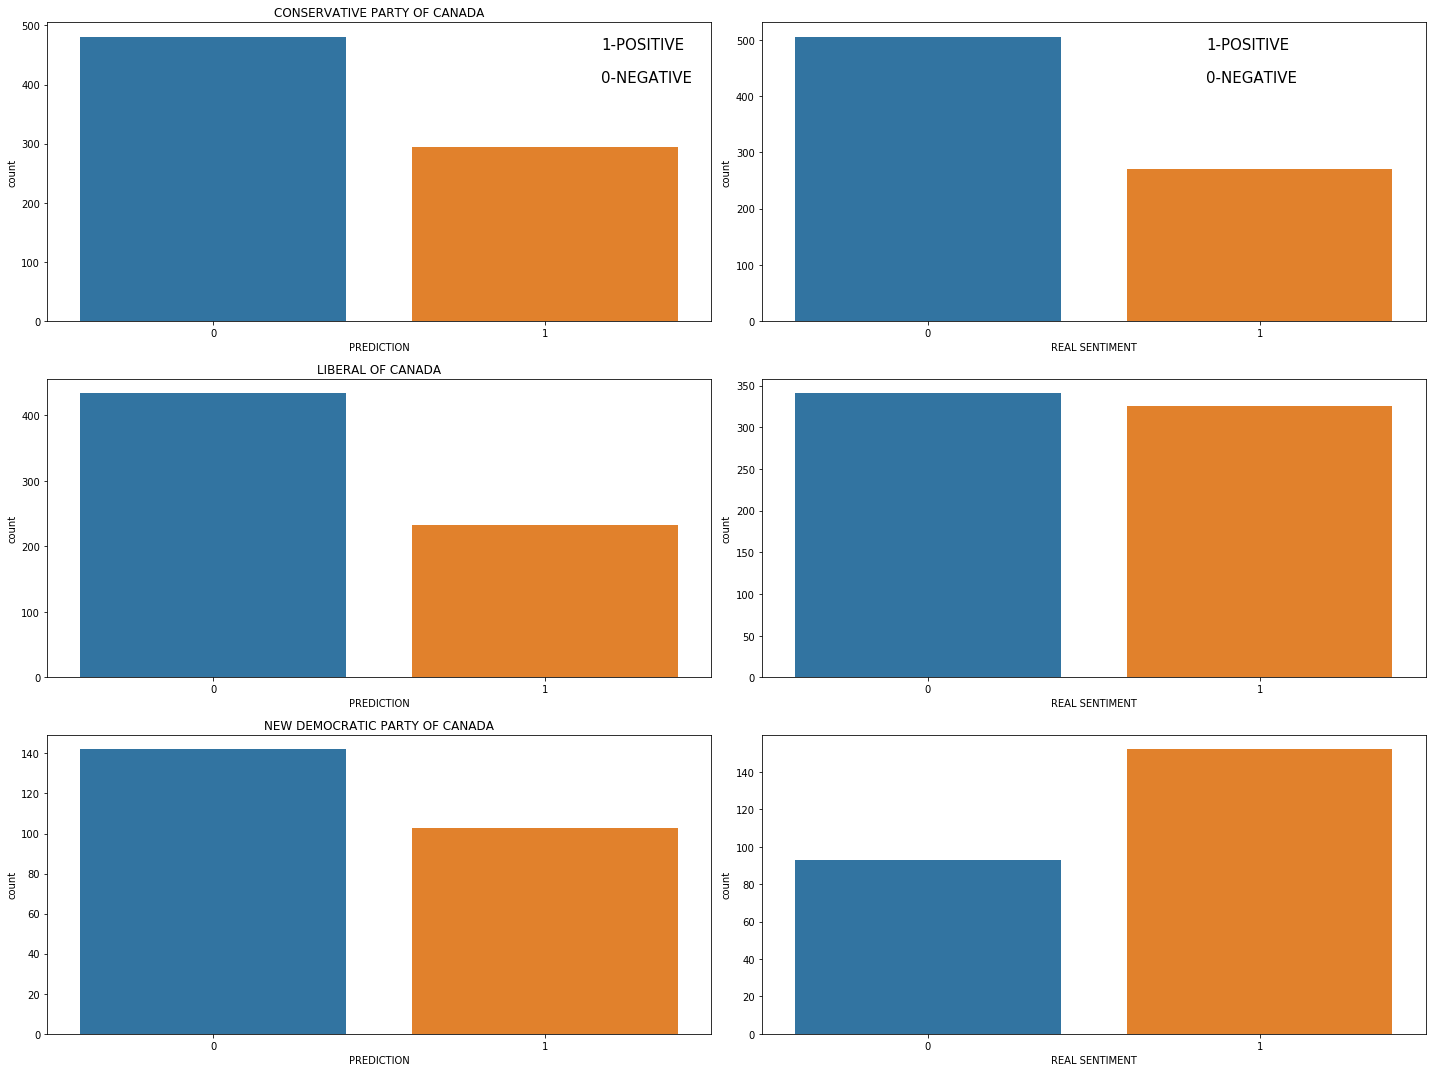

In [85]:
# EXTRACTING DATA NEGATIVE SENTIMENT
# print(df1.shape)
indco=df1[df1.co==1].index
dfco=df1.iloc[indco,:]
# print(dfco.shape)

# EXTRACTING DATA NEGATIVE SENTIMENT
# print(df1.shape)
indli=df1[df1.li==1].index
dfli=df1.iloc[indli,:]
# print(dfli.shape)

# EXTRACTING DATA NEGATIVE SENTIMENT
# print(df1.shape)
indndp=df1[df1.ndp==1].index
dfndp=df1.iloc[indndp,:]
# print(dfndp.shape)


fig, ax =plt.subplots(3,2,figsize=(20,15))

sns.countplot("prediction_xgb",data=dfco,ax=ax[0,0])
sns.countplot("sentiment_le",data=dfco,ax=ax[0,1])
sns.countplot("prediction_xgb",data=dfli,ax=ax[1,0])
sns.countplot("sentiment_le",data=dfli,ax=ax[1,1])
sns.countplot("prediction_xgb",data=dfndp,ax=ax[2,0])
sns.countplot("sentiment_le",data=dfndp,ax=ax[2,1])
ax[0,0].set_xlabel("PREDICTION")
ax[0,1].set_xlabel("REAL SENTIMENT")
ax[1,0].set_xlabel("PREDICTION")
ax[1,1].set_xlabel("REAL SENTIMENT")
ax[2,0].set_xlabel("PREDICTION")
ax[2,1].set_xlabel("REAL SENTIMENT")
fig.text(0.84, 0.95,'1-POSITIVE', fontsize=15)
fig.text(0.84, 0.92,'0-NEGATIVE', fontsize=15)
fig.text(0.42, 0.95,'1-POSITIVE', fontsize=15)
fig.text(0.42, 0.92,'0-NEGATIVE', fontsize=15)

ax[0,0].title.set_text('CONSERVATIVE PARTY OF CANADA')
ax[1,0].title.set_text('LIBERAL OF CANADA')
ax[2,0].title.set_text('NEW DEMOCRATIC PARTY OF CANADA')

fig.tight_layout()
# fig.suptitle('CONSERVATIVE PARTY OF CANADA', fontsize=16)
fig.show()



# DISCUSSION:
BY OBSERVING THE PLOTS WE CAN SEE THAT FOR CONSERVATIVE PARTY THE MODEL PREDICTION IS MORE OR LESS SIMILAR TO THE REAL SENTIMENT.BUT THE REAL SENTIMENTS HAVE MORE NEGATIVE VALUES COMPARED TO POSITIVE VALUES.

FOR LIBERAL PARTY OUR MODEL PREDICTS LESS POSITIVE SENTIMENT COMPARED TO THE REAL SENTIMENTS 

FOR NEW DEMOCRATIC PARTY THE MODEL PREDICTIONS ARE NOT ACCURATE.

EVENTHOUGH THE ACCURACY IS LOW (i.e approximately 50 percent) THE TWITTER DATA ANALYSIS GIVES A GENERAL INSITE ABOUT THE PEOPLES OPINION AND HELPS TO MAKE PREDICTIONS ABOUT UPCOMING ELECTIONS 
THE CHART BELOW DESCRIBES THE ELECTION RESULTS:(SOURCE:WIKIPEDIA)

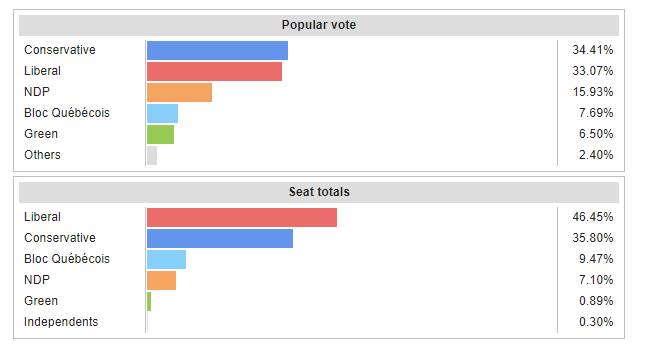

IT CAN BE SEEN THE THAT IN OUR PREDICTIONS THE CONSERVATIVE PARTY HAS THE MOST COUNTS OF POSITIVE SENTIMENT ABOUT 300 AND THE LIBERAL PARTY HAS 250 COUNTS OF POSITIVE SENTIMENT AND THE NDP HAS 100 COUNTS WHICH IS SIMILAR TO THE POPULAR VOTE SHARE MENTIONED IN THE CHART ABOVE.

THIS SHOWS THAT TWITTER DATA ANALYSIS REALLY CAPTURES THE SENTIMENT OF THE PUBLIC EVEN THOUGH IT HAS A LOW ACCURACY.

**ACCURACY:**   
THE MODEL ACCURACY ACN BE IMPROVED BY TRAINING THE MODEL ON SIMILAR PAST CANADIAN ELECTION DATASET RATHER THAN A GENERAL SENTIMENT DATASET. THIS WILL HELP THE MODEL CAPTURE THE NEUANCES OF TWEETS BY THE CANADIAN POPULATION AND THUS PREDICTS BETTER 


# WORD FREQUENCY:

In [86]:
dff.sentiment.unique()
s_map={'Positive': 1, 'Negative' :0}
target1=dff.sentiment.map(s_map)
target1=np.array(target1)
print(target1[0:5])
print(np.shape(target1))
dff["sentiment_le"]=target1

[1 0 1 1 1]
(130669,)


In [87]:
feat=dff["clean_data"]
vectorizer = CountVectorizer(max_features=1000)
array_WF_feat = vectorizer.fit_transform(feat)

In [88]:
xtrain,xtest,ytrain,ytest=train_test_split(array_WF_feat,target1,random_state=42)
print(np.shape(xtrain),np.shape(xtest))

(98001, 1000) (32668, 1000)


 **WE FIT THE WORD FREQUENCY FEATURE VECTOR WITH THE FOLLOWING MODELS
 LOGISTIC REGRESSION      
 MULTINOMIAL NAIVE BAYES     
 KNN  
 SVM   
 DECISION TREES  
 RANDOM FOREST     
 GRADIENT BOOSTING    
 XGBOOST**  

# HYPER PARAMETER TUNING: 
**HYPER PARAMETER TUNING WITH CROSSVALIDATION** IS DONE FOR ALL THESE MODELS AND THE BEST MODEL IS SELECTED FOR ACCURACY CALCULATION.

THE HYPERPARAMETER TUNING PART OF THE CODE HAS BEEN CONVERTED TO COMMENTS SINCE IT TAKES LONGER TIME TO RUN

THEY CAN BE UNCOMMENTED AND CHECKED IF NEEDED



In [89]:
# #List Hyperparameters that we want to tune.
# solver= ['newton-cg','lbfgs','liblinear', 'sag', 'saga']
# C = [0.001,0.01,0.1,1]

# #Convert to dictionary
# hyperparameters = dict(solver=solver,C=C)

# #Create new model
# lr=LogisticRegression(max_iter=300)

# #Use GridSearch
# clf = GridSearchCV(lr, hyperparameters, cv=5)

# #Fit the model
# lr_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best solver:', lr_best_model.best_estimator_.get_params()['solver'])
# print('Best C:', lr_best_model.best_estimator_.get_params()['C'])
# print('Best Model score:', lr_best_model.best_score_*100)
# print('\n Best model:',lr_best_model.best_estimator_)

Best solver: newton-cg  
Best C: 0.1   
Best Model score: 74.179853016662   

 Best model: LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [90]:
#LOGISTIC REGRESSION
print("\nLOGISTIC REGRESSION")
wf_lr=LogisticRegression(C=0.1,solver='newton-cg')
wf_lr_model=wf_lr.fit(xtrain,ytrain)
wf_lr_pred=wf_lr.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(wf_lr_pred,ytrain)*100,2))
wf_lr_pred=wf_lr.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(wf_lr_pred,ytest)*100,2))


LOGISTIC REGRESSION
TRAINING ACCURACY 74.92
TESTING ACCURACY 74.07


In [91]:
#MULTINOMIAL NAIVE BAYES
print("\nMULTINOMIAL NAIVE BAYES")
wf_mnb=MultinomialNB()
wf_mnb=wf_mnb.fit(xtrain,ytrain)
wf_mnb_pred=wf_mnb.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(wf_mnb_pred,ytrain)*100,2))
wf_mnb_pred=wf_mnb.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(wf_mnb_pred,ytest)*100,2))


MULTINOMIAL NAIVE BAYES
TRAINING ACCURACY 73.21
TESTING ACCURACY 72.42


In [92]:
# #List Hyperparameters that we want to tune.
# n_neighbors = list(range(1,5))

# #Convert to dictionary
# hyperparameters = dict( n_neighbors=n_neighbors)

# #Create new KNN object
# knn = KNeighborsClassifier()

# #Use GridSearch
# clf = GridSearchCV(knn, hyperparameters, cv=5)

# #Fit the model
# knn_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best n_neighbors:', knn_best_model.best_estimator_.get_params()['n_neighbors'])
# print('Best Model score:', knn_best_model.best_score_*100)
# print('\n Best model:',knn_best_model.best_estimator_)

Best n_neighbors: 4  
Best Model score: 66.58605600089126  

 Best model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [93]:
# K NEAREST NEIGHBOUR-KNN
print("\nK NEAREST NEIGHBOUR-KNN")
wf_knn=KNeighborsClassifier(n_neighbors=4)
wf_knn.fit(xtrain,ytrain)
pred=wf_knn.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=wf_knn.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


K NEAREST NEIGHBOUR-KNN
TRAINING ACCURACY 77.71
TESTING ACCURACY 66.39


**SVM** IS IMPLEMENTED USING SGD **(Stochastic Gradient Descent)** WITH **HINGE LOSS** 

In [94]:
# #List Hyperparameters that we want to tune.
# a = [0.0001,0.001,0.01,0.1,1]

# #Convert to dictionary
# hyperparameters = dict(alpha=a)

# #Create new model
# sgd=SGDClassifier(loss='hinge')

# #Use GridSearch
# clf = GridSearchCV(sgd, hyperparameters, cv=5)

# #Fit the model
# sgd_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Learning Rate:', sgd_best_model.best_estimator_.get_params()['alpha'])
# print('Best Model score:', sgd_best_model.best_score_*100)
# print('\n Best model:',sgd_best_model.best_estimator_)

Best Learning Rate: 0.0001   
Best Model score: 74.0584248617053   

 Best model: SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
# SVM-SGD
print("\nSVM-SGD")
wf_sgd=SGDClassifier(alpha=0.0001, loss='hinge')
wf_sgd.fit(xtrain,ytrain)
pred=wf_sgd.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=wf_sgd.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


SVM-SGD
TRAINING ACCURACY 74.88
TESTING ACCURACY 73.83


In [96]:
# #List Hyperparameters that we want to tune.
# criterion=['gini', 'entropy']
# splitter=['best', 'random']

# #Convert to dictionary
# hyperparameters = dict(criterion=criterion,splitter=splitter)

# #Create a new model
# dt=DecisionTreeClassifier()

# #Use GridSearch
# clf = GridSearchCV(dt, hyperparameters, cv=5)

# #Fit the model
# dt_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Criterion:', dt_best_model.best_estimator_.get_params()['criterion'])
# print('Best Splitter:', dt_best_model.best_estimator_.get_params()['splitter'])

# print('Best Model score:', dt_best_model.best_score_*100)
# print('\n Best model:',dt_best_model.best_estimator_)

Best Criterion: entropy  
Best Splitter: random  
Best Model score: 68.59725789708772  

 Best model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [97]:
# DECISION TREES
print("\nDECISION TREES")
wf_dt=DecisionTreeClassifier(criterion='entropy',splitter='random')
wf_dt.fit(xtrain,ytrain)
pred=wf_dt.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=wf_dt.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


DECISION TREES
TRAINING ACCURACY 95.81
TESTING ACCURACY 67.69


In [98]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,75,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# rf=RandomForestClassifier()

# #Use GridSearch
# clf = GridSearchCV(rf, hyperparameters, cv=2)

# #Fit the model
# rf_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', rf_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', rf_best_model.best_score_*100)
# print('\n Best model:',rf_best_model.best_estimator_)

Best Estimator Count: 100  
Best Model score: 72.0594673203254  

 Best model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [99]:
# RANDOM FOREST
print("\nRANDOM FOREST")
wf_rf=RandomForestClassifier(n_estimators=100)
wf_rf.fit(xtrain,ytrain)
pred=wf_rf.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=wf_rf.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


RANDOM FOREST
TRAINING ACCURACY 95.81
TESTING ACCURACY 71.84


In [100]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,75,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# gb=GradientBoostingClassifier()

# #Use GridSearch
# clf = GridSearchCV(gb, hyperparameters, cv=2)

# #Fit the model
# gb_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', gb_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', gb_best_model.best_score_*100)
# print('\n Best model:',gb_best_model.best_estimator_)

Best Estimator Count: 100  
Best Model score: 66.50033799810001  

 Best model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [101]:
# GRADIENT BOOSTING
print("\nGRADIENT BOOSTING")
wf_gb=GradientBoostingClassifier(n_estimators=100)
wf_gb.fit(xtrain,ytrain)
pred=wf_gb.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=wf_gb.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))


GRADIENT BOOSTING
TRAINING ACCURACY 66.88
TESTING ACCURACY 66.55


In [102]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# wf_xgb = XGBClassifier()

# #Use GridSearch
# clf = GridSearchCV(xgb, hyperparameters, cv=2)

# #Fit the model
# wf_xgb_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', wf_xgb_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', wf_xgb_best_model.best_score_*100)
# print('\n Best model:',wf_xgb_best_model.best_estimator_)

Best Estimator Count: 100  
Best Model score: 72.99517283903828   

 Best model: XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [103]:
# xgb_model = XGBClassifier()
wf_xgb_model=XGBClassifier(n_estimators=100)
wf_xgb_model.fit(xtrain,ytrain)
print("XGBOOST")
pred=wf_xgb_model.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=wf_xgb_model.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))

XGBOOST
TRAINING ACCURACY 74.7
TESTING ACCURACY 73.09


# SENTIMENT DATASET ACCURACIES:

**LOGISTIC REGRESSION**   
TRAINING ACCURACY 74.92  
TESTING ACCURACY 74.07  

**MULTINOMIAL NAIVE BAYES**  
TRAINING ACCURACY 73.21  
TESTING ACCURACY 72.42  

**K NEAREST NEIGHBOUR-KNN**    
TRAINING ACCURACY 77.71  
TESTING ACCURACY 66.39  

**SVM-SGD** 
TRAINING ACCURACY 74.89  
TESTING ACCURACY 73.82  


**DECISION TREES**  
TRAINING ACCURACY 95.81  
TESTING ACCURACY 67.85  

**RANDOM FOREST**  
TRAINING ACCURACY 95.81  
TESTING ACCURACY 71.99  

**GRADIENT BOOSTING**  
TRAINING ACCURACY 66.88  
TESTING ACCURACY 66.55  

**XGBOOST**  
TRAINING ACCURACY 74.7  
TESTING ACCURACY 73.09  

**WE CAN SEE THAT ALMOST ALL MODELS HAVE TESTING ACCURACY IN THE 70'S**     
 
**WE CAN ALSO SEE THAT THE RANDOM FOREST AND DECISON TREES HAVE VERY HIGH TRAINING ACCURACIES COMPARED TO OTHER MODELS EVEN AFTER HYPERPARAMETER TUNING WITH CROSS VALIDATION**



# CANADIAN DATASET:

**LETS IMPLEMENT THE TRAINED MODEL IN CANADIAN DATASET AND CHECK THE ACCURACY**

In [104]:
ct1=df1["clean_tweet"]
s_map={'Positive': 1, 'Negative' :0}
tgt1=df1.sentiment.map(s_map)
print(tgt1[0:5])
print(np.shape(tgt1))


0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: int64
(2133,)


In [105]:
vectorizer = CountVectorizer(max_features=1000)
array_WF_feat = vectorizer.fit_transform(ct1)

In [106]:
wf_lr_ca_pred=wf_lr.predict(array_WF_feat)
print("LOGISTIC REGRESSION")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt1,wf_lr_ca_pred)*100,2))
wf_mnb_ca_pred=wf_mnb.predict(array_WF_feat)
print("\nNAIVE BAYES")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt1,wf_mnb_ca_pred)*100,2))
wf_knn_ca_pred=wf_knn.predict(array_WF_feat)
print("\nKNN")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt1,wf_knn_ca_pred)*100,2))
wf_sgd_ca_pred=wf_mnb.predict(array_WF_feat)
print("\nSVM-SGD")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt1,wf_sgd_ca_pred)*100,2))
wf_dt_ca_pred=wf_dt.predict(array_WF_feat)
print("\nDECISION TREES")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt1,wf_dt_ca_pred)*100,2))
wf_rf_ca_pred=wf_rf.predict(array_WF_feat)
print("\nRANDOM FOREST")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt1,wf_rf_ca_pred)*100,2))
wf_gb_ca_pred=wf_gb.predict(array_WF_feat)
print("\nGRADIENT BOOSTING")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt1,wf_gb_ca_pred)*100,2))
wf_xgb_ca_pred=wf_xgb_model.predict(array_WF_feat)
print("\nXGBOOST")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(tgt1,wf_xgb_ca_pred)*100,2))

LOGISTIC REGRESSION
CANADIAN DATASET ACCURACY 51.29

NAIVE BAYES
CANADIAN DATASET ACCURACY 50.63

KNN
CANADIAN DATASET ACCURACY 50.3

SVM-SGD
CANADIAN DATASET ACCURACY 50.63

DECISION TREES
CANADIAN DATASET ACCURACY 51.24

RANDOM FOREST
CANADIAN DATASET ACCURACY 51.71

GRADIENT BOOSTING
CANADIAN DATASET ACCURACY 49.13

XGBOOST
CANADIAN DATASET ACCURACY 54.29


# CANADIAN DATASET ACCURACY:

**LOGISTIC REGRESSION**  
CANADIAN DATASET ACCURACY 51.29  

**NAIVE BAYES**  
CANADIAN DATASET ACCURACY 50.63  

**KNN**  
CANADIAN DATASET ACCURACY 50.3  

**SVM-SGD**  
CANADIAN DATASET ACCURACY 50.63  

**DECISION TREES**  
CANADIAN DATASET ACCURACY 51.66  

**RANDOM FOREST**  
CANADIAN DATASET ACCURACY 51.15  

**GRADIENT BOOSTING**  
CANADIAN DATASET ACCURACY 49.13  

**XGBOOST**  
CANADIAN DATASET ACCURACY 54.29  

# XGBOOST ALGORITHM HAS THE BEST PERFORMANCE

In [107]:
pre=wf_xgb_model.predict(array_WF_feat)

In [108]:
df1["prediction_xgb1"]=pre

In [109]:
df1.columns

Index(['sentiment', 'negative_reason', 'text', 'at', 'hsh', 'clean_tweet',
       'co', 'li', 'ndp', 'sentiment_le', 'prediction_xgb', 'prediction_xgb1'],
      dtype='object')

C:\Users\aditya\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


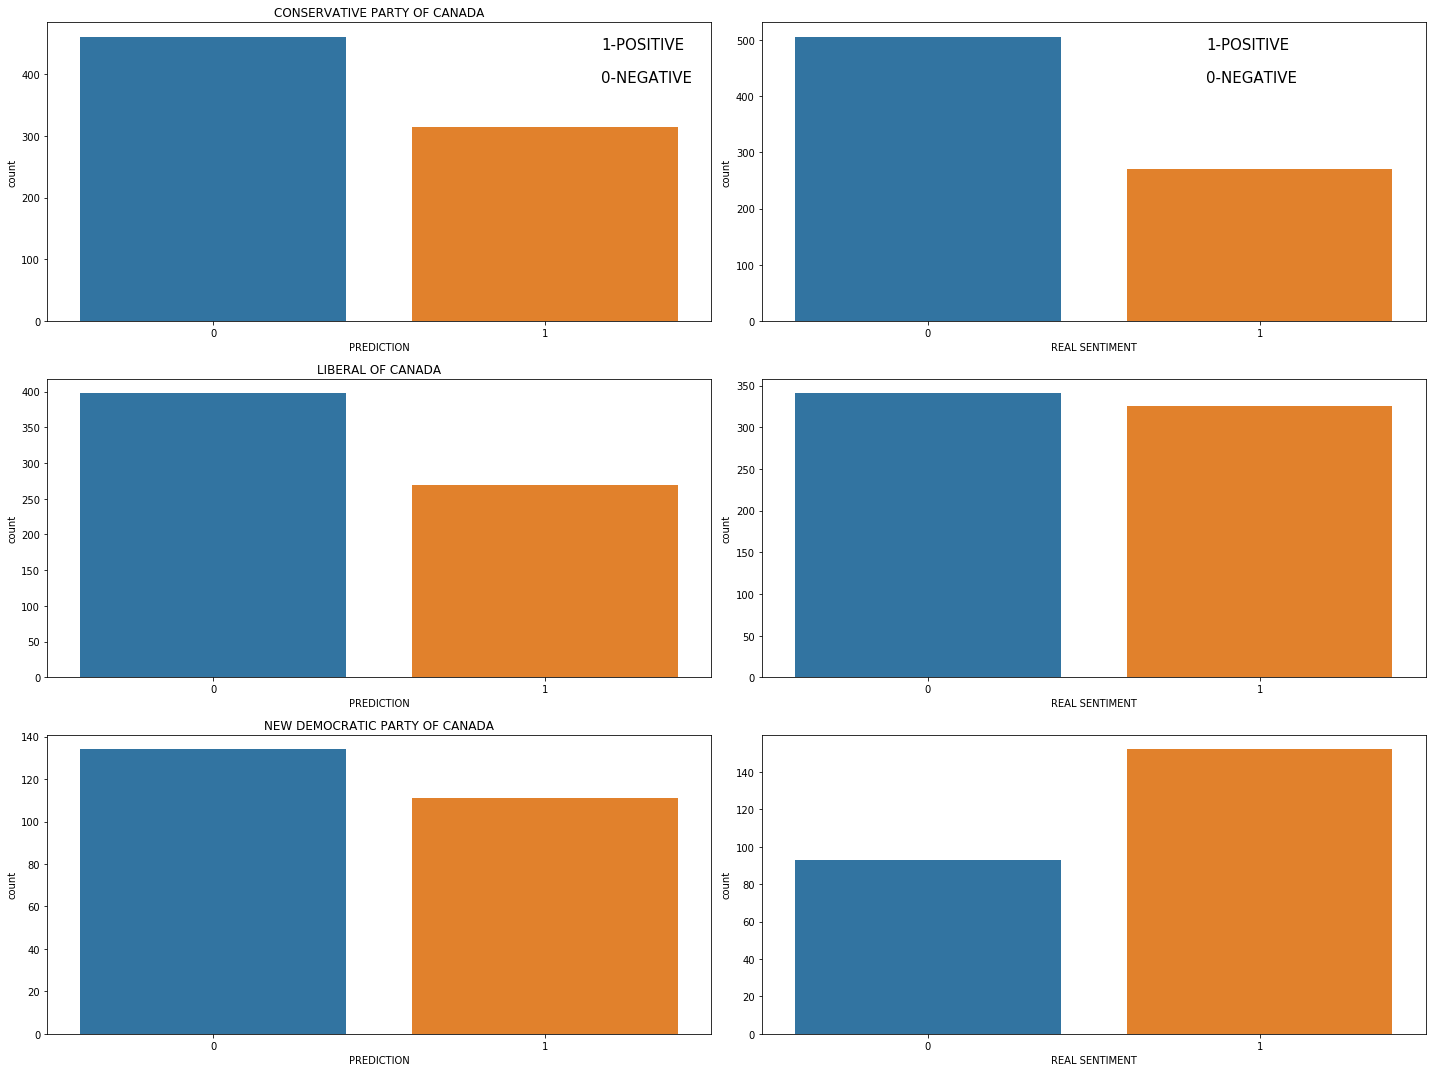

In [110]:
# EXTRACTING DATA NEGATIVE SENTIMENT
# print(df1.shape)
indco=df1[df1.co==1].index
dfco=df1.iloc[indco,:]
# print(dfco.shape)

# EXTRACTING DATA NEGATIVE SENTIMENT
# print(df1.shape)
indli=df1[df1.li==1].index
dfli=df1.iloc[indli,:]
# print(dfli.shape)

# EXTRACTING DATA NEGATIVE SENTIMENT
# print(df1.shape)
indndp=df1[df1.ndp==1].index
dfndp=df1.iloc[indndp,:]
# print(dfndp.shape)


fig, ax =plt.subplots(3,2,figsize=(20,15))

sns.countplot("prediction_xgb1",data=dfco,ax=ax[0,0])
sns.countplot("sentiment_le",data=dfco,ax=ax[0,1])
sns.countplot("prediction_xgb1",data=dfli,ax=ax[1,0])
sns.countplot("sentiment_le",data=dfli,ax=ax[1,1])
sns.countplot("prediction_xgb1",data=dfndp,ax=ax[2,0])
sns.countplot("sentiment_le",data=dfndp,ax=ax[2,1])
ax[0,0].set_xlabel("PREDICTION")
ax[0,1].set_xlabel("REAL SENTIMENT")
ax[1,0].set_xlabel("PREDICTION")
ax[1,1].set_xlabel("REAL SENTIMENT")
ax[2,0].set_xlabel("PREDICTION")
ax[2,1].set_xlabel("REAL SENTIMENT")
fig.text(0.84, 0.95,'1-POSITIVE', fontsize=15)
fig.text(0.84, 0.92,'0-NEGATIVE', fontsize=15)
fig.text(0.42, 0.95,'1-POSITIVE', fontsize=15)
fig.text(0.42, 0.92,'0-NEGATIVE', fontsize=15)

ax[0,0].title.set_text('CONSERVATIVE PARTY OF CANADA')
ax[1,0].title.set_text('LIBERAL OF CANADA')
ax[2,0].title.set_text('NEW DEMOCRATIC PARTY OF CANADA')

fig.tight_layout()
# fig.suptitle('CONSERVATIVE PARTY OF CANADA', fontsize=16)
fig.show()


# DISCUSSION:
BY OBSERVING THE PLOTS WE CAN SEE THAT FOR CONSERVATIVE PARTY THE MODEL PREDICTION IS MORE OR LESS SIMILAR TO THE REAL SENTIMENT.BUT THE REAL SENTIMENTS HAVE MORE NEGATIVE VALUES COMPARED TO POSITIVE VALUES.

FOR LIBERAL PARTY OUR MODEL PREDICTS LESS POSITIVE SENTIMENT COMPARED TO THE REAL SENTIMENTS 

FOR NEW DEMOCRATIC PARTY THE MODEL PREDICTIONS ARE NOT ACCURATE.

EVENTHOUGH THE ACCURACY IS LOW (i.e approximately 50 percent) THE TWITTER DATA ANALYSIS GIVES A GENERAL INSITE ABOUT THE PEOPLES OPINION AND HELPS TO MAKE PREDICTIONS ABOUT UPCOMING ELECTIONS 
THE CHART BELOW DESCRIBES THE ELECTION RESULTS:(SOURCE:WIKIPEDIA)

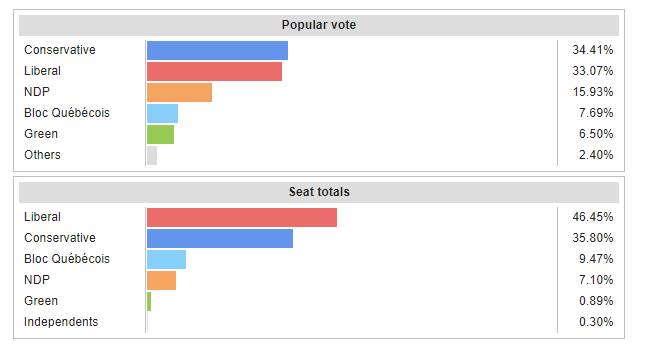

IT CAN BE SEEN THE THAT IN OUR PREDICTIONS THE CONSERVATIVE PARTY HAS THE MOST COUNTS OF POSITIVE SENTIMENT ABOUT 300 AND THE LIBERAL PARTY HAS 250 COUNTS OF POSITIVE SENTIMENT AND THE NDP HAS 100 COUNTS WHICH IS SIMILAR TO THE POPULAR VOTE SHARE MENTIONED IN THE CHART ABOVE.

THIS SHOWS THAT TWITTER DATA ANALYSIS REALLY CAPTURES THE SENTIMENT OF THE PUBLIC EVEN THOUGH IT HAS A LOW ACCURACY.

**ACCURACY:**   
THE MODEL ACCURACY ACN BE IMPROVED BY TRAINING THE MODEL ON SIMILAR PAST CANADIAN ELECTION DATASET RATHER THAN A GENERAL SENTIMENT DATASET. THIS WILL HELP THE MODEL CAPTURE THE NEUANCES OF TWEETS BY THE CANADIAN POPULATION AND THUS PREDICTS BETTER 


   # BONUS
   # WORD EMBEDDINGS

In [111]:
!pip install gensim
from gensim.models import word2vec

In [112]:
#LABEL ENCODING TARGETS
dff.sentiment.unique()
s_map={'Positive': 1, 'Negative' :0}
t1=dff.sentiment.map(s_map)
t1=np.array(t1)
print(t1[0:5])
print(np.shape(t1))

[1 0 1 1 1]
(130669,)


In [113]:
featu=dff["clean_data"]
print(featu[1:5])

1     damn jealous wanna watch fight love ufc one know
2                              listening beatles great
3    could please get shout anything huge fan wait ...
4                      spotted ur message tony replied
Name: clean_data, dtype: object


In [114]:
#TOKENIZING FAETURES
tokenized_sentences = [sentence.split() for sentence in featu]
model = word2vec.Word2Vec(tokenized_sentences, size=100, min_count=1)

In [115]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    text = text.split()
    for word in text:
        vec += model.wv[word].reshape((1, size))
        count += 1.
    if count != 0:
        vec /= count
    return vec

In [116]:
array_wordEmbedding = np.concatenate([buildWordVector(z, 100) for z in featu])

In [117]:
# std= StandardScaler()
# array_wordEmbedding=std.fit_transform(array_wordEmbedding)

In [118]:
#SPLLITING THE DATA
xtrain,xtest,ytrain,ytest=train_test_split(array_wordEmbedding,t1,random_state=42)
print(np.shape(xtrain),np.shape(xtest))

(98001, 100) (32668, 100)


**NOW LETS APPLY LOGISTIC REGRESSION ON THE DATA**

In [119]:
#LOGISTIC REGRESSION
print("\nLOGISTIC REGRESSION")
we_lr=LogisticRegression(solver='newton-cg')
we_lr_model=we_lr.fit(xtrain,ytrain)
we_lr_pred=we_lr.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(we_lr_pred,ytrain)*100,2))
we_lr_pred=we_lr.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(we_lr_pred,ytest)*100,2))


LOGISTIC REGRESSION
TRAINING ACCURACY 71.92
TESTING ACCURACY 71.22


**TESTING ON CANADIAN ELECTION DATASET**

In [120]:
#LABEL ENCODING TARGETS
ct2=df1["clean_tweet"]
s_map={'Positive': 1, 'Negative' :0}
t2=df1.sentiment.map(s_map)
print(t2[0:5])
print(np.shape(t2))

0    0
1    1
2    0
3    1
4    0
Name: sentiment, dtype: int64
(2133,)


In [121]:
#TOKENIZING FAETURES
tokenized_sentences = [sentence.split() for sentence in ct2]
model = word2vec.Word2Vec(tokenized_sentences, size=100, min_count=1)

In [122]:
array_wordEmbedding1 = np.concatenate([buildWordVector(z, 100) for z in ct2])

In [123]:
we_lr_ca_pred=we_lr.predict(array_wordEmbedding1)
print("LOGISTIC REGRESSION")
print("CANADIAN DATASET ACCURACY",round(accuracy_score(t2,we_lr_ca_pred)*100,2))


LOGISTIC REGRESSION
CANADIAN DATASET ACCURACY 52.84


**WE GET A ACCURACY OF 52.84 FOR LOGISTIC REGRESSION   
NOW LET TRY TO FIT A DEEP NEURAL NETWORK ON THE DATA AND SEE ITS PERFORMANCE**

# NEURAL NETWORK

In [124]:
# %tensorflow_version 2.x
! pip install tensorflow==1.14

In [125]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Dense

In [126]:
# split into input (X) and output (y) variables
X = array_wordEmbedding
y = t1

xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42)
print(np.shape(xtrain),np.shape(xtest))

(98001, 100) (32668, 100)


In [127]:
#MODEL DEIFINITION
model = keras.Sequential()
model.add(Dense(40, activation=tf.nn.relu, input_shape=[100]))
model.add(Dense(80, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.tanh))
model.add(Dense(1, activation=tf.nn.tanh))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [128]:
#MODEL COMPILATION
model.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

WE ARE USING __EARLY STOPPING__ CALL BACK TO __GENERALIZE THE MODEL AND PREVENT OVERFITTING__

In [129]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [130]:
#MODEL CHECK POINT TO SAVE THE BEST MODEL DURING TRAINING
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5')
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [131]:
#TRAINING MODEL
history = model.fit(xtrain, ytrain, epochs=250, verbose=0, validation_split = 0.3,
                    callbacks=[early_stop,mc])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 00001: val_loss improved from inf to 0.57150, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.57150 to 0.55648, saving model to best_model.h5

Epoch 00003: val_loss improved from 0.55648 to 0.54603, saving model to best_model.h5

Epoch 00004: val_loss did not improve from 0.54603

Epoch 00005: val_loss did not improve from 0.54603

Epoch 00006: val_loss did not improve from 0.54603

Epoch 00007: val_loss improved from 0.54603 to 0.54391, saving model to best_model.h5

Epoch 00008: val_loss improved from 0.54391 to 0.54224, saving model to best_model.h5

Epoch 00009: val_loss improved from 0.54224 to 0.54180, saving model to best_model.h5

Epoch 00010: val_loss improved from 0.54180 to 0.53794, saving model to best_model.h5

Epoch 00011: val_loss did not improve from 0.53794

Epoch 00012: val_loss did not improve from 0.53794

Epoch 00013: val_loss improved from 0.53

In [132]:
# load the saved model
model.load_weights('best_model.h5')

In [133]:
#ACCURACY
train_loss,train_acc = model.evaluate(xtrain, ytrain)
print('Training Accuracy: %.2f' % (train_acc*100))

test_loss,test_acc = model.evaluate(xtest, ytest)
print('Training Accuracy: %.2f' % (test_acc*100))


elec_loss, elec_acc = model.evaluate(array_wordEmbedding1, t2)
print('Canadian dataset Testing Accuracy: %.2f' % (elec_acc*100))

98001/98001 [==============================] - 2s 19us/sample - loss: 0.5276 - acc: 0.7326
Training Accuracy: 73.26
32668/32668 [==============================] - 1s 19us/sample - loss: 0.5408 - acc: 0.7206
Training Accuracy: 72.06
2133/2133 [==============================] - 0s 22us/sample - loss: 0.8874 - acc: 0.5284
Canadian dataset Testing Accuracy: 52.84


98001/98001 [==============================] - 3s 32us/sample - loss: 0.5329 - acc: 0.73050s - loss: 0.5328 - acc: 0.73   
Training Accuracy: 73.05   
32668/32668 [==============================] - 1s 30us/sample - loss: 0.5474 - acc: 0.7171   
Training Accuracy: 71.71   
2133/2133 [==============================] - 0s 28us/sample - loss: 0.7513 - acc: 0.5284   
Canadian dataset Testing Accuracy: 52.84   


**WE GET A TRAINING ACCURACY OF 52.84 WHICH SAME AS THAT OF LOGISTIC REGRESSION    
WE CAN OBSERVE THAT DEEP NEURAL NETWORK IS NOT GIVING BETTER PERFORMANCE COMPARED TO TRADITIONAL MACHINE LEARNING TECHNIQUES SUCH AS LOGISTIC REGRESSION**

# N-GRAMS

**LETS APPLY TRIGRAM TO THE FEATURES AND LETS SEE THE PERFORMANCE OF THE MODEL**

In [134]:
#SENTIMENT DATA SET NGRAM
vectorizer_ng = CountVectorizer(max_features=1000,ngram_range=(1,3))
array_ng_feat = vectorizer_ng.fit_transform(featu)

In [135]:
#SPLITTING THE DATA
xtrain,xtest,ytrain,ytest=train_test_split(array_ng_feat,t1)
print(np.shape(xtrain),np.shape(xtest))

(98001, 1000) (32668, 1000)


In [136]:
#CANADIAN DATASET NGRAM
vectorizer_ng = CountVectorizer(max_features=1000,ngram_range=(1,3))
cd_ng_feat = vectorizer_ng.fit_transform(ct2)

**LETS APPLY XGBOOSTING ALGORITHM TO THE NGRAM FEATURES** 

In [137]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# ng_xgb = XGBClassifier()

# #Use GridSearch
# clf = GridSearchCV(ng_xgb, hyperparameters, cv=2)

# #Fit the model
# ng_xgb_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', ng_xgb_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', ng_xgb_best_model.best_score_*100)
# print('\n Best model:',ng_xgb_best_model.best_estimator_)

Best Estimator Count: 100  
Best Model score: 72.83905095231293  

 Best model: XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [138]:
# xgb_model = XGBClassifier()
ng_xgb=XGBClassifier(n_estimators=100)
ng_xgb.fit(xtrain,ytrain)
print("XGBOOST")
pred=ng_xgb.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(ytrain,pred)*100,2))
pred=ng_xgb.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score( ytest,pred)*100,2))
pred=ng_xgb.predict(cd_ng_feat)
print('Canadian dataset Testing Accuracy:',round(accuracy_score(t2,pred)*100,2))

XGBOOST
TRAINING ACCURACY 74.73
TESTING ACCURACY 72.76
Canadian dataset Testing Accuracy: 52.32


**XGBOOST HAS A TRAINING ACCURACY OF 51.76    
LETS APPLY NEURAL NETWORK MODEL AND SEE HOW IT PERFORMS**

# NEURAL NETWORK

In [139]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Dropout, Dense

In [140]:
# split into input (X) and output (y) variables
X = array_ng_feat
y = t1

xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42)
print(np.shape(xtrain),np.shape(xtest))

(98001, 1000) (32668, 1000)


In [141]:
# MODEL DEFINITION
model = keras.Sequential()
model.add(Dense(20, activation=tf.nn.tanh, input_shape=[1000]))
model.add(Dense(30, activation=tf.nn.tanh))
model.add(Dense(10, activation=tf.nn.tanh))
model.add(Dropout(0.25))
model.add(Dense(1, activation=tf.nn.tanh))

In [142]:
#COMPILING MODEL
model.compile(optimizer=tf.train.AdamOptimizer(),loss='binary_crossentropy',metrics=['accuracy'])

In [143]:
#EARLY STOPPING TO PREVENT OVERFITTING
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [144]:
#MODEL CHECKPOINT TO SAVE THE BEST MODEL DURING TRAINING
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5')
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [145]:
#MODEL FITTING
history = model.fit(xtrain, ytrain, epochs=100, verbose=0,validation_split = 0.3,callbacks=[early_stop,mc])


Epoch 00001: val_loss improved from inf to 0.62923, saving model to best_model.h5

Epoch 00002: val_loss improved from 0.62923 to 0.58039, saving model to best_model.h5

Epoch 00003: val_loss did not improve from 0.58039

Epoch 00004: val_loss improved from 0.58039 to 0.57658, saving model to best_model.h5

Epoch 00005: val_loss improved from 0.57658 to 0.56400, saving model to best_model.h5

Epoch 00006: val_loss improved from 0.56400 to 0.55837, saving model to best_model.h5

Epoch 00007: val_loss did not improve from 0.55837

Epoch 00008: val_loss improved from 0.55837 to 0.53494, saving model to best_model.h5

Epoch 00009: val_loss improved from 0.53494 to 0.53228, saving model to best_model.h5

Epoch 00010: val_loss did not improve from 0.53228

Epoch 00011: val_loss did not improve from 0.53228

Epoch 00012: val_loss did not improve from 0.53228

Epoch 00013: val_loss did not improve from 0.53228

Epoch 00014: val_loss did not improve from 0.53228

Epoch 00015: val_loss did not 

In [146]:
# load the saved model
model.load_weights('best_model.h5')

In [147]:
#ACCURACY
train_loss,train_acc = model.evaluate(xtrain, ytrain)
print('Training Accuracy: %.2f' % (train_acc*100),'\n')

test_loss,test_acc = model.evaluate(xtest, ytest)
print('Training Accuracy: %.2f' % (test_acc*100),'\n')

elec_loss, elec_acc = model.evaluate(cd_ng_feat, t2)
print('Canadian dataset Testing Accuracy: %.2f' % (elec_acc*100))

98001/98001 [==============================] - 4s 43us/sample - loss: 0.5010 - acc: 0.7545
Training Accuracy: 75.45 

32668/32668 [==============================] - 1s 37us/sample - loss: 0.5312 - acc: 0.7360
Training Accuracy: 73.60 

2133/2133 [==============================] - 0s 41us/sample - loss: 1.5372 - acc: 0.5129
Canadian dataset Testing Accuracy: 51.29


98001/98001 [==============================] - 5s 55us/sample - loss: 0.5016 - acc: 0.75571s - los
Training Accuracy: 75.57 

32668/32668 [==============================] - 2s 57us/sample - loss: 0.5277 - acc: 0.7378
Training Accuracy: 73.78 

2133/2133 [==============================] - 0s 92us/sample - loss: 1.0651 - acc: 0.5021
Canadian dataset Testing Accuracy: 50.21

**WE GET A TRAINING ACCURACY OF 50.21 WHICH IS LESS THAN 51.76 OBTAINED FOR XGBOOST    
WE CAN OBSERVE THAT DEEP NEURAL NETWORK IS NOT GIVING BETTER PERFORMANCE COMPARED TO XGBOOST**

# CANADIAN DATASET:  NEGATIVE REASON'S

**LETS TAKE THE NEGATIVE TWEETS IN THE CANADIAN DATASET AND LETS TRY TO CLASSIFY THEM INTO DIFFERENT CALSSES BASED ON REASONS**

In [148]:
df1.head()

,sentiment,negative_reason,text,at,hsh,clean_tweet,co,li,ndp,sentiment_le,prediction_xgb,prediction_xgb1
0,Negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ...",rosiebarton,canadian women andrewscheer conservatives ...,instead suggestion agree canadian woman trust ...,True,False,False,0,1,1
1,Positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio...",,allwomanspacewalk cityofto onpoli cdnpoli ...,allwomanspacewalk real n netobicokenorth cityo...,False,False,False,1,0,0
2,Negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO...",,brantford elxn43 cdnpoli canada,brantford going cost billion next year ask jus...,False,False,False,0,0,0
3,Positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#...",,canada canadaelection2019 canadavotes,canada canadavotes n ncan decide help n n,False,False,False,1,0,0
4,Negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h...",snclavalin sheila_copps,canada taxpayers trudeaumustgo. canada snc...,canada taxpayer sick amp tired hard earned don...,False,True,False,0,1,1


In [149]:
# EXTRACTING DATA NEGATIVE SENTIMENT
ind=df1[df1.sentiment=="Negative"].index
dfc=df1.iloc[ind,:]
print(dfc.shape)

(1006, 12)


In [150]:
dfc.negative_reason.unique()

array(['Women Reproductive right and Racism', 'Economy', 'Others',
       'Scandal', 'Tell lies', 'Privilege', 'Climate Problem',
       'Healthcare', 'Separation', 'Healthcare and Marijuana'],
      dtype=object)

In [151]:
dfc.negative_reason.value_counts()

Others                                 364
Scandal                                270
Tell lies                              198
Economy                                 51
Women Reproductive right and Racism     45
Climate Problem                         41
Separation                              16
Privilege                               12
Healthcare                               5
Healthcare and Marijuana                 4
Name: negative_reason, dtype: int64

**WE CAN COMBINE  'Healthcare' AND 'Healthcare and Marijuana' INTO A SINGLE CLASS   
NOW LETS LABEL ENCODE THE CLASSES**



In [152]:
c_map={'Women Reproductive right and Racism':0, 'Economy':1, 'Others':2,
       'Scandal':3, 'Tell lies':4, 'Privilege':5, 'Climate Problem':6,
       'Healthcare and Marijuana':7, 'Separation':8,"Healthcare":7 }
labels=dfc.negative_reason.map(c_map)
print(np.unique(labels))

[0 1 2 3 4 5 6 7 8]


In [153]:
#EXTRACTING FEATURES
features=dfc.clean_tweet
features.shape

(1006,)

# TF-IDF :

**WE USE TF-IDF FOR FEATURE TRANSFORMATION
THE FOLLOWING MODELS WERE IMPLEMENTED IN TF- BASED FEATURE VECTOR
 LOGISTIC REGRESSION      
 MULTINOMIAL NAIVE BAYES     
 KNN  
 SVM   
 DECISION TREES  
 RANDOM FOREST     
 GRADIENT BOOSTING    
 XGBOOST**  

**HYPERPARAMETER TUNING WITH CROSS VALIDATION** HAS BEEN DONE FOR ALL THESE MODELS

THE HYPER PARAMETER TUNING PART HAS BEEN COMMENTED OUT BECAUSE IT TAKES LONGER TIME TO RUN AND CAN BE UNCOMMENTED AND CHECKED IF NEEDED

In [154]:
tfidf = TfidfVectorizer(use_idf=True,max_features=1000)
tfs = tfidf.fit_transform(features)

# std=StandardScaler()
# tfs=std.fit_transform(tfs)

xtrain,xtest,ytrain,ytest=train_test_split(tfs,labels,random_state=42)
print(np.shape (xtrain),np.shape(xtest))

(754, 1000) (252, 1000)


In [155]:
# #List Hyperparameters that we want to tune.
# solver= ['newton-cg','lbfgs','liblinear', 'sag', 'saga']
# C = [0.001,0.01,0.1,1]

# #Convert to dictionary
# hyperparameters = dict(solver=solver,C=C)

# #Create new model
# lr=LogisticRegression(max_iter=200)

# #Use GridSearch
# clf = GridSearchCV(lr, hyperparameters, cv=5)

# #Fit the model
# lr_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best solver:', lr_best_model.best_estimator_.get_params()['solver'])
# print('Best C:', lr_best_model.best_estimator_.get_params()['C'])
# print('Best Model score:', lr_best_model.best_score_*100)
# print('\n Best model:',lr_best_model.best_estimator_)

Best solver: newton-cg  
Best C: 1  
Best Model score: 51.19646799116998  

 Best model: LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
# lr=lr_best_model.best_estimator_
lr=LogisticRegression(C=1,solver='newton-cg')
lr.fit(xtrain,ytrain)
print("LOGISTIC REGRESSION:")
print("TRAIN ACCURACY",round(accuracy_score(ytrain,lr.predict(xtrain))*100,2))
print("TEST ACCURACY",round(accuracy_score(ytest,lr.predict(xtest))*100,2))

LOGISTIC REGRESSION:
TRAIN ACCURACY 74.4
TEST ACCURACY 51.59


C:\Users\aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [157]:
# from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
print("MULTINOMIAL NAIVE BAYES")
print("TRAIN ACCURACY",round(accuracy_score(ytrain,mnb.predict(xtrain))*100,2))
print("TEST ACCURACY",round(accuracy_score(ytest,mnb.predict(xtest))*100,2))

MULTINOMIAL NAIVE BAYES
TRAIN ACCURACY 71.88
TEST ACCURACY 48.81


In [158]:
# #List Hyperparameters that we want to tune.
# n_neighbors = list(range(1,5))

# #Convert to dictionary
# hyperparameters = dict( n_neighbors=n_neighbors)

# #Create new KNN object
# knn = KNeighborsClassifier()

# #Use GridSearch
# clf = GridSearchCV(knn, hyperparameters, cv=5)

# #Fit the model
# knn_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best n_neighbors:', knn_best_model.best_estimator_.get_params()['n_neighbors'])
# print('Best Model score:', knn_best_model.best_score_*100)
# print('\n Best model:',knn_best_model.best_estimator_)

Best n_neighbors: 4   
Best Model score: 37.66622516556291

 Best model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [159]:
# knn=knn_best_model.best_estimator_
knn=KNeighborsClassifier( n_neighbors=4)
knn.fit(xtrain,ytrain)
print("KNN")
print("TRAIN ACCURACY",round(accuracy_score(ytrain,knn.predict(xtrain))*100,2))
print("TEST ACCURACY",round(accuracy_score(ytest,knn.predict(xtest))*100,2))

KNN
TRAIN ACCURACY 59.28
TEST ACCURACY 33.33


In [160]:
# #List Hyperparameters that we want to tune.
# a = [0.0001,0.001,0.01,0.1,1]

# #Convert to dictionary
# hyperparameters = dict(alpha=a)

# #Create new model
# sgd=SGDClassifier(loss='hinge')

# #Use GridSearch
# clf = GridSearchCV(sgd, hyperparameters, cv=5)

# #Fit the model
# sgd_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Learning Rate:', sgd_best_model.best_estimator_.get_params()['alpha'])
# print('Best Model score:', sgd_best_model.best_score_*100)
# print('\n Best model:',sgd_best_model.best_estimator_)

Best Learning Rate: 0.01  
Best Model score: 55.441059602649  

 Best model: SGDClassifier(alpha=0.01, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [161]:
# sgd=sgd_best_model.best_estimator_
sgd=SGDClassifier(alpha=0.01,loss='hinge')
sgd.fit(xtrain,ytrain)
print("SVM-SGD")
print("TRAIN ACCURACY",round(accuracy_score(ytrain,sgd.predict(xtrain))*100,2))
print("TEST ACCURACY",round(accuracy_score(ytest,sgd.predict(xtest))*100,2))

SVM-SGD
TRAIN ACCURACY 86.34
TEST ACCURACY 54.76


In [162]:
# #List Hyperparameters that we want to tune.
# criterion=['gini', 'entropy']
# splitter=['best', 'random']

# #Convert to dictionary
# hyperparameters = dict(criterion=criterion,splitter=splitter)

# #Create a new model
# dt=DecisionTreeClassifier()

# #Use GridSearch
# clf = GridSearchCV(dt, hyperparameters, cv=5)

# #Fit the model
# dt_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Criterion:', dt_best_model.best_estimator_.get_params()['criterion'])
# print('Best Splitter:', dt_best_model.best_estimator_.get_params()['splitter'])

# print('Best Model score:', dt_best_model.best_score_*100)
# print('\n Best model:',dt_best_model.best_estimator_)

Best Criterion: entropy  
Best Splitter: random  
Best Model score: 49.46931567328918   

 Best model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [163]:
# dt=dt_best_model.best_estimator_
dt=DecisionTreeClassifier(criterion='entropy', splitter='random')
dt.fit(xtrain,ytrain)
print("DECISION TREES")
print("TRAIN ACCURACY",round(accuracy_score(ytrain,dt.predict(xtrain))*100,2))
print("TEST ACCURACY",round(accuracy_score(ytest,dt.predict(xtest))*100,2))

DECISION TREES
TRAIN ACCURACY 99.87
TEST ACCURACY 46.03


In [164]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,75,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# rf=RandomForestClassifier()

# #Use GridSearch
# clf = GridSearchCV(rf, hyperparameters, cv=2)

# #Fit the model
# rf_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', rf_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', rf_best_model.best_score_*100)
# print('\n Best model:',rf_best_model.best_estimator_)

Best Estimator Count: 75  
Best Model score: 51.45888594164456   

 Best model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=75,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [165]:
# rf=rf_best_model.best_estimator_
rf=RandomForestClassifier(n_estimators=75)
rf.fit(xtrain,ytrain)
print("RANDOM FOREST")
print("TRAIN ACCURACY",round(accuracy_score(ytrain,rf.predict(xtrain))*100,2))
print("TEST ACCURACY",round(accuracy_score(ytest,rf.predict(xtest))*100,2))

RANDOM FOREST
TRAIN ACCURACY 99.87
TEST ACCURACY 57.94


In [166]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,75,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# gb=GradientBoostingClassifier()

# #Use GridSearch
# clf = GridSearchCV(gb, hyperparameters, cv=2)

# #Fit the model
# gb_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', gb_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', gb_best_model.best_score_*100)
# print('\n Best model:',gb_best_model.best_estimator_)

Best Estimator Count: 50  
Best Model score: 53.9787798408488  

 Best model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [167]:
# gb=gb_best_model.best_estimator_
gb=GradientBoostingClassifier(n_estimators=50)
gb.fit(xtrain,ytrain)
print("GRADIENT BOOSTING")
print("TRAIN ACCURACY",round(accuracy_score(ytrain,gb.predict(xtrain))*100,2))
print("TEST ACCURACY",round(accuracy_score(ytest,gb.predict(xtest))*100,2))

GRADIENT BOOSTING
TRAIN ACCURACY 88.99
TEST ACCURACY 55.95


In [168]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# xgb = XGBClassifier()

# #Use GridSearch
# clf = GridSearchCV(xgb, hyperparameters, cv=2)

# #Fit the model
# xgb_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', wf_xgb_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', wf_xgb_best_model.best_score_*100)
# print('\n Best model:',wf_xgb_best_model.best_estimator_)

Best Estimator Count: 100
Best Model score: 72.99517283903828

 Best model: XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [169]:
# xgb_model = XGBClassifier()
xgb_model=XGBClassifier(n_estimators=100)
xgb_model.fit(xtrain,ytrain)
print("XGBOOST")
pred=xgb_model.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=xgb_model.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))

XGBOOST
TRAINING ACCURACY 99.2
TESTING ACCURACY 53.97


# NEGATIVE REASONS CLASSIFICATION ACCURACIES:
**LOGISTIC REGRESSION:**  
TRAIN ACCURACY 74.4  
TEST ACCURACY 51.59  

**MULTINOMIAL NAIVE BAYES**  
TRAIN ACCURACY 71.88  
TEST ACCURACY 48.81  

**KNN**  
TRAIN ACCURACY 59.42  
TEST ACCURACY 33.33  

**SVM-SGD**  
TRAIN ACCURACY 87.14  
TEST ACCURACY 54.76  

**DECISION TREES**  
TRAIN ACCURACY 99.87  
TEST ACCURACY 49.63  

**RANDOM FOREST**  
TRAIN ACCURACY 99.87  
TEST ACCURACY 57.14  

**GRADIENT BOOSTING**  
TRAIN ACCURACY 89.26  
TEST ACCURACY 56.75  

**XGBOOST**  
TRAINING ACCURACY 99.2  
TESTING ACCURACY 53.97  

 **BEST TESTING ACCURACIES WERE OBTAINED FOR RANDOM FOREST**

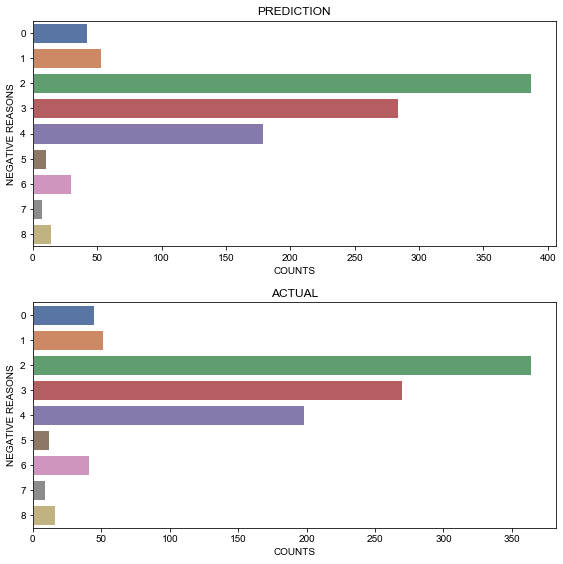

In [170]:
pdn=rf.predict(tfs)
fig,ax=plt.subplots(2,1,figsize=(8,8))
sns.set(style="darkgrid")
sns.countplot(y=pdn,ax=ax[0])
sns.countplot(y=labels,ax=ax[1])
ax[0].title.set_text('PREDICTION')
ax[1].title.set_text('ACTUAL')
ax[0].set_ylabel("NEGATIVE REASONS")
ax[1].set_ylabel("NEGATIVE REASONS")
ax[0].set_xlabel("COUNTS")
ax[1].set_xlabel("COUNTS")
# fig.suptitle('CANADIAN DATASET-NEGATIVE REASONS', fontsize=16)
fig.tight_layout()
plt.show()

**we see that lot of labels are misclassified as 2 which stands for "OTHERS"
lets inspect the tweets and try to figure out why this is happening**

In [171]:
# xgb_model = XGBClassifier()
print("RANDOM FOREST PREDICTION")
predn=rf.predict(xtest)
print(predn[0:10])
print("RANDOM FOREST LABELS")
print(ytest[0:10])

RANDOM FOREST PREDICTION
[3 2 2 3 2 2 3 2 3 3]
RANDOM FOREST LABELS
1952    2
1181    2
1314    2
935     3
680     3
1242    4
1243    1
961     2
598     3
115     3
Name: negative_reason, dtype: int64


'Women Reproductive right and Racism':0, 'Economy':1, 'Others':2,'Scandal':3, 'Tell lies':4, 'Privilege':5, 'Climate Problem':6,'Healthcare and Marijuana':7, 'Separation':8,"Healthcare":7 

In [172]:
print(features[1952])
print(features[680])
print(features[1242])


b toddler informed prime minister canceleday
b hey scheerrepublican trump calling stay hell canadian cdnpoli bcpoli onpoli quepoli
b canada deserves better hope every conservative canada wake fact cpc pack wolf sheep clothing nothing conservative n nvote


# DISCUSSION
THE MODEL HAS WORSE ACCURACY BECAUSE IT OVERFITS THE TRAINING DATA EVEN AFTER CROSSVALIDATION    
THIS LEADS TO DECREASE IN ACCURACY OF TEST DATA   
WE CAN OVERCOME THIS OVER FITTING PROBLEM BY INCREASING THE SIZE OF TRAINING SET, WE HAVE 700 TRAINING SAMPLES   
IF THERE ARE MORE TRAINING INSTANCES IT WILL HELP TO GENERALIZE THE DATA
 

THE MODEL MISCLASSIFIES ALOT OF THE LABELS AS CLASS 2("OTHERS"). IF WE CAN EXPAND CLASS 2 INTO DIFFERENT CATEGORIES OUR ACCURACY MIGHT INCREASE       


   # BONUS
   # WORD EMBEDDINGS- NEGATIVE REASONS CLASSIFICATION

In [173]:
!pip install gensim
from gensim.models import word2vec

In [174]:
#WORD EMBEDDING FEATURE TRANSFORMATION
tokenized_sentences = [sentence.split() for sentence in features]
model = word2vec.Word2Vec(tokenized_sentences, size=100, min_count=1)

In [175]:
def buildWordVector(text, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    text = text.split()
    for word in text:
        vec += model.wv[word].reshape((1, size))
        count += 1.
    if count != 0:
        vec /= count
    return vec

In [176]:
array_wordEmbedding = np.concatenate([buildWordVector(z, 100) for z in features])

In [177]:
std= StandardScaler()
array_wordEmbedding =std.fit_transform(array_wordEmbedding)

In [178]:
#DATA SPLITTING
xtrain,xtest,ytrain,ytest=train_test_split(array_wordEmbedding,labels,random_state=42)
print(np.shape(xtrain),np.shape(xtest))

(754, 100) (252, 100)


**HYPERPARAMETER TRAINING:**

In [179]:
# #List Hyperparameters that we want to tune.
# solver= ['newton-cg','lbfgs','liblinear', 'saga']
# C = [0.001,0.01,0.1,1]

# #Convert to dictionary
# hyperparameters = dict(solver=solver,C=C)

# #Create new model
# we_lr=LogisticRegression(max_iter=300)

# #Use GridSearch
# clf = GridSearchCV(we_lr, hyperparameters, cv=5)

# #Fit the model
# we_lr_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best solver:', we_lr_best_model.best_estimator_.get_params()['solver'])
# print('Best C:', we_lr_best_model.best_estimator_.get_params()['C'])
# print('Best Model score:', we_lr_best_model.best_score_*100)
# print('\n Best model:',we_lr_best_model.best_estimator_)

Best solver: liblinear  
Best C: 0.01  
Best Model score: 42.57395143487859

 Best model: LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
#LOGISTIC REGRESSION
we_lr=LogisticRegression(C=0.01, solver='liblinear')
we_lr_model=we_lr.fit(xtrain,ytrain)

C:\Users\aditya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [181]:
#ACCURACY
we_lr_pred=we_lr.predict(xtrain)
print("TRAINING ACCURACY",accuracy_score(we_lr_pred,ytrain))
we_lr_pred=we_lr.predict(xtest)
print("TESTING ACCURACY",accuracy_score(we_lr_pred,ytest))

TRAINING ACCURACY 0.4761273209549072
TESTING ACCURACY 0.42063492063492064


**LOGISTIC REGRESSION GIVES A ACCURACY OF 41 PERCENT    
LETS APPLY NEURAL NETWORK AND CHECK ITS PERFORMANCE**


# NEURAL NETWORK

In [182]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Dropout, Dense

In [183]:
# split into input (X) and output (y) variables
X = array_wordEmbedding
y1 = labels

from tensorflow.keras.utils import to_categorical
y= to_categorical(y1)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42)
print(np.shape(xtrain),np.shape(xtest))

(754, 100) (252, 100)


In [184]:
#MODEL DEFINITION
model = keras.Sequential()
model.add(Dense(40, activation=tf.nn.tanh, input_shape=[100]))
model.add(Dense(80, activation=tf.nn.tanh))
model.add(Dense(10, activation=tf.nn.tanh))
model.add(Dense(9, activation=tf.nn.softmax))

In [185]:
#MODEL COMPILATION
model.compile(optimizer=tf.train.AdamOptimizer(),loss='categorical_crossentropy',metrics=['accuracy'])

In [186]:
#EARLY STOPPING TO GENERALIZE THE DATA
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

In [187]:
# #SAVE BEST MODEL USING MODEL CHECKPOINT
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5')
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [188]:
#MODEL FITTING
history = model.fit(xtrain, ytrain, epochs=300, verbose=0,validation_split = 0.3,callbacks=[early_stop,mc])


Epoch 00001: val_loss improved from inf to 2.11430, saving model to best_model.h5

Epoch 00002: val_loss improved from 2.11430 to 2.01687, saving model to best_model.h5

Epoch 00003: val_loss improved from 2.01687 to 1.93091, saving model to best_model.h5

Epoch 00004: val_loss improved from 1.93091 to 1.83627, saving model to best_model.h5

Epoch 00005: val_loss improved from 1.83627 to 1.76494, saving model to best_model.h5

Epoch 00006: val_loss improved from 1.76494 to 1.70213, saving model to best_model.h5

Epoch 00007: val_loss improved from 1.70213 to 1.69087, saving model to best_model.h5

Epoch 00008: val_loss improved from 1.69087 to 1.64595, saving model to best_model.h5

Epoch 00009: val_loss improved from 1.64595 to 1.62899, saving model to best_model.h5

Epoch 00010: val_loss improved from 1.62899 to 1.61804, saving model to best_model.h5

Epoch 00011: val_loss improved from 1.61804 to 1.61315, saving model to best_model.h5

Epoch 00012: val_loss improved from 1.61315 to

In [189]:
# load the saved model
model.load_weights('best_model.h5')

In [190]:
#ACCURACY 
train_loss,train_acc = model.evaluate(xtrain, ytrain)
print('Training Accuracy: %.2f' % (train_acc*100),'\n')

test_loss,test_acc = model.evaluate(xtest, ytest)
print('Training Accuracy: %.2f' % (test_acc*100),'\n')


754/754 [==============================] - 0s 34us/sample - loss: 1.3571 - acc: 0.5066
Training Accuracy: 50.66 

252/252 [==============================] - 0s 44us/sample - loss: 1.5076 - acc: 0.4683
Training Accuracy: 46.83 



754/754 [==============================] - 0s 54us/sample - loss: 1.3640 - acc: 0.5265   
Training Accuracy: 52.65    
  
252/252 [==============================] - 0s 55us/sample - loss: 1.6162 - acc: 0.3651  
Training Accuracy: 36.51  

**ACCURACY OF NEURAL NETWORK IS THAN THAT OF LOGISTIC REGRESSION**

# N-GRAMS

In [191]:
#NGRAM FEATURE TRANSFORMATION
vectorizer_ng = CountVectorizer(max_features=2000,ngram_range=(1,3))
array_ng_feat = vectorizer_ng.fit_transform(features)

In [192]:
#SPLITTING DATA
xtrain,xtest,ytrain,ytest=train_test_split(array_ng_feat,labels)
print(np.shape(xtrain),np.shape(xtest))

(754, 2000) (252, 2000)


**HYPERPARAMETER TUNING:**

In [193]:
# #List Hyperparameters that we want to tune.
# n_estimators=[25,50,100]

# #Convert to dictionary
# hyperparameters = dict(n_estimators=n_estimators)

# #Create new model
# ng_xgb = XGBClassifier()

# #Use GridSearch
# clf = GridSearchCV(ng_xgb, hyperparameters, cv=2)

# #Fit the model
# ng_xgb_best_model = clf.fit(xtrain,ytrain)

# #Print The value of best Hyperparameters
# print('Best Estimator Count:', ng_xgb_best_model.best_estimator_.get_params()['n_estimators'])
# print('Best Model score:', ng_xgb_best_model.best_score_*100)
# print('\n Best model:',ng_xgb_best_model.best_estimator_)

Best Estimator Count: 25  
Best Model score: 53.05039787798409  

 Best model: XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [194]:
# xgb_model = XGBClassifier()
ng_xgb=XGBClassifier(n_estimators=25)
ng_xgb.fit(xtrain,ytrain)
print("XGBOOST")
pred=ng_xgb.predict(xtrain)
print("TRAINING ACCURACY",round(accuracy_score(pred,ytrain)*100,2))
pred=ng_xgb.predict(xtest)
print("TESTING ACCURACY",round(accuracy_score(pred,ytest)*100,2))

XGBOOST
TRAINING ACCURACY 84.75
TESTING ACCURACY 60.32


XGBOOST GIVES A ACCURACY OF 57.94   
LETS APPLY NEURAL NETWORK AND CHECK ITS PERFORMANCE 

# NEURAL NETWORK

In [195]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import  Dropout, Dense

In [196]:
# split into input (X) and output (y) variables
X = array_ng_feat
y1 = labels

from tensorflow.keras.utils import to_categorical
y= to_categorical(y1)

xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=42)
print(np.shape(xtrain),np.shape(xtest))

(754, 2000) (252, 2000)


In [197]:
# MODEL DEFINITION
model = keras.Sequential()
model.add(Dense(20, activation=tf.nn.tanh, input_shape=[2000]))
model.add(Dense(30, activation=tf.nn.tanh))
model.add(Dense(10, activation=tf.nn.tanh))
model.add(Dense(9, activation=tf.nn.softmax))

In [198]:
#MODEL COMPILATION
model.compile(optimizer=tf.train.AdamOptimizer(),loss='categorical_crossentropy',metrics=['accuracy'])

In [199]:
# EARLY STOPPING TO GENERALIZE THE MODEL
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [200]:
# MODEL CHECKPOINT TO SAVE THE MODEL
from tensorflow.keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('best_model.h5')
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [201]:
#TRAINING THE MODEL
history = model.fit(xtrain, ytrain, epochs=1000, verbose=0, validation_split = 0.3,
                    callbacks=[early_stop,mc])


Epoch 00001: val_loss improved from inf to 2.08598, saving model to best_model.h5

Epoch 00002: val_loss improved from 2.08598 to 1.97483, saving model to best_model.h5

Epoch 00003: val_loss improved from 1.97483 to 1.85970, saving model to best_model.h5

Epoch 00004: val_loss improved from 1.85970 to 1.75395, saving model to best_model.h5

Epoch 00005: val_loss improved from 1.75395 to 1.67648, saving model to best_model.h5

Epoch 00006: val_loss improved from 1.67648 to 1.64357, saving model to best_model.h5

Epoch 00007: val_loss improved from 1.64357 to 1.62988, saving model to best_model.h5

Epoch 00008: val_loss did not improve from 1.62988

Epoch 00009: val_loss did not improve from 1.62988

Epoch 00010: val_loss did not improve from 1.62988

Epoch 00011: val_loss did not improve from 1.62988

Epoch 00012: val_loss did not improve from 1.62988

Epoch 00013: val_loss did not improve from 1.62988

Epoch 00014: val_loss did not improve from 1.62988

Epoch 00015: val_loss did not 

In [202]:
# load the saved model
model.load_weights('best_model.h5')

In [203]:
#ACCURACY
train_loss,train_acc = model.evaluate(xtrain, ytrain)
print('Training Accuracy: %.2f' % (train_acc*100),'\n')

test_loss,test_acc = model.evaluate(xtest, ytest)
print('Training Accuracy: %.2f' % (test_acc*100),'\n')


754/754 [==============================] - 0s 63us/sample - loss: 1.0166 - acc: 0.7560
Training Accuracy: 75.60 

252/252 [==============================] - 0s 75us/sample - loss: 1.6072 - acc: 0.4802
Training Accuracy: 48.02 



**WE SEE THAT THE NEURAL NETWORKS PERFORMANCE IS LESS THAN THE XGBOOSTS ACCURACY**